# Antarctic Cities Data Analysis

## Circles of Sustainability Survey Results from Punta Arenas and Hobart

As part of the Antarctic Cities project, we are conducting surveys of people's attitudes in the Antarctic Cities of Punta Arenas, Hobart and Christchurch.

This report includes preliminary analysis of results from two of those cities, Punta Arenas $(N = 300)$ and Hobart $(N = 200)$. The survey itself has been developed from a previous survey developed by several of the research's Chief Investigators, Prof. Paul James and Dr. Liam Magee, and adapted to include a number of questions relating to the Antarctic. More details can be at <http://www.circlesofsustainability.org/tools/social-life-questionnaire/>.

In Punta Arenas, led by Dr. Claudia Estrada, psychology students at the University of Magallanes administered the survey through face-to-face interviews in the city. In Hobart, the survey was administered via CATI (Computer-Aided Telephone Interviews) by a panel provider company. These different methosd of administration introduce differences in the sample: the Hobart survey uses quota sampling to ensure approximate distributions of participants by agen and gender, the Punta Arenas sample is more pronouncedly skewed in several ways, and is likely less reresentative of that city's propulation than the Hobart sample. 

We also lack, at this time, population data to generate weights for the Punta Arenas sample. Such weights attempt to even up the sample by adding or subtracting weights from under- or over-represented age-sex groups. 

Notwithstanding these limitations, the samples allow for some exploratory comparison presently.

These provisional results include the code used in analysis. This permits quick reproduction of results during our data exploration phase. Published reports will of course not include these and other artefacts.




## Data Preparation

Loads common imports, and defines some generic SPSS functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import savReaderWriter
import seaborn as sns


import tabulate
from IPython.display import HTML, display


Set general parameters of the notebook.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,9);

Load the Punta Arenas and Hobart data set, and combine them.

In [63]:
import common as c
ds_hob = c.DataSet("data/hob.sav")
ds_pa = c.DataSet("data/pa.sav")


Fix issue with additional Antarctic question 14 in Punta Arenas.

In [64]:
ds_hob.data = ds_hob.data.rename(columns = {'An_22': 'An_14_ghost'} )
ds_hob.data = ds_hob.data.rename(columns = {'An_14': 'An_15', 
                              'An_15': 'An_16', 
                              'An_16': 'An_17', 
                              'An_17': 'An_18', 
                              'An_18': 'An_19', 
                              'An_19': 'An_20',
                              'An_20': 'An_21',
                              'An_21': 'An_22',
                              'An_14_ghost': 'An_14'} )


In [65]:
# Declares columns to render in graphs
cols_not_to_render = ['Folio', 'Location', 'An_14', 'Soc_2a', 'Soc_8', 'Soc_9a', 'Postcode', 'Weight', 'An_14', 'An_23a', 'An_23b', 'An_23c', ]
cols_to_render = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21', 'An_22',
       'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40', 'Soc_1', 'Soc_3', 'Soc_2b', 'Soc_4', 'Soc_5',
       'Soc_6', 'Soc_7', 'Soc_9b','Soc_10']



Combine the data, after the fix-up above.

In [66]:

data_combined = pd.concat([ds_hob.data, ds_pa.data], keys = ['hob', 'pa']) 

ds = c.DataSet()
ds.data = data_combined
ds.metadata = ds_hob.metadata
ds.data['Weight'].fillna(1., inplace=True)


## Exploratory data

In [67]:
### Hobart

## Show the first few rows of the Hobart data set - UNCOMMENT TO VIEW.
# ds_hob.data.head()

## Show the columns of the Hobart data set - UNCOMMENT TO VIEW.
# print(ds_hob.data.info())


### Punta Arenas

## Show the first few rows of the Punta Arenas data set - UNCOMMENT TO VIEW.
# ds_pa.data.head()

## Show the columns of the Hobart data set - UNCOMMENT TO VIEW.
# ds_pa.data.info()


### Combined

## Show the first few rows of the combined data set - UNCOMMENT TO VIEW.
# ds.data.head()

## Show the columns of the combined data set - UNCOMMENT TO VIEW.
# ds.data.info()


## Age and Gender composition

The following table shows overall breakdown of the samples by age and gender.


### Hobart, by age and gender

In [68]:
# np.floor(ds_hob.data['Soc_2a'] / 10.).value_counts().sort_index()
# ds.data['Soc_2b'].dropna().value_counts().sort_index()


# Hobart data
tmp = ds_hob.data.loc[:, ['Soc_2a', 'Soc_3', 'Folio']]
tmp.columns = ['age', 'sex', 'Folio']
tmp['sex'].replace([1., 2., 3.],['Female', 'Male', 'Other'],inplace=True)
tmp.loc[:,'decade'] = pd.Series(np.floor(tmp.loc[:,'age'] / 10.))
tmp.drop(['age'], axis=1, inplace = True)
# tmp['decade'] = tmp['decade'].astype(int)
age_sex_a = tmp.groupby(by = ['decade', 'sex']).size().unstack(level=1)
age_sex_a.loc[6.0,:] = np.sum(age_sex_a.loc[6.0:9.0,:])
if 7.0 in age_sex_a.index:
    age_sex_a.drop(7.0, axis=0, inplace = True)
if 8.0 in age_sex_a.index:
    age_sex_a.drop(8.0, axis=0, inplace = True)
if 9.0 in age_sex_a.index:
    age_sex_a.drop(9.0, axis=0, inplace = True)


# Display the results
s = tabulate.tabulate(age_sex_a, headers="keys", tablefmt='html')
display(HTML(s))




decade,Female,Male
1,6,9
2,13,17
3,11,11
4,11,19
5,26,24
6,22,27


In [69]:
ds_hob.data['An_15'].value_counts()

1.0    180
2.0     19
Name: An_15, dtype: int64

In [70]:
ds_pa.data['An_15'].value_counts()

1.0    236
2.0     64
Name: An_15, dtype: int64


### Punta Arenas, by age and gender

In [71]:

# Punta Arenas

tmp = ds_hob.data.loc[:, ['Soc_2b', 'Soc_3']]
tmp.columns = ['age', 'sex']
tmp = tmp.dropna(axis = 0, subset = ['age'])
tmp['sex'].replace([1., 2., 3.],['Female', 'Male', 'Other'],inplace=True)
age_sex_b = tmp.groupby(by = ['age', 'sex']).size().unstack(level=1)
# print(age_sex_b)


# Display the results
s = tabulate.tabulate(age_sex_b, headers="keys", tablefmt='html')
display(HTML(s))

age,Female,Male
1,6,9
2,13,17
3,11,11
4,13,19
5,28,24
6,22,27


In [72]:
# Comined

age_sex = age_sex_a.join(age_sex_b, how='outer', lsuffix='_a', rsuffix='_b', sort=True)
age_sex['Female'] = age_sex['Female_a'] + age_sex['Female_b']
age_sex['Male'] = age_sex['Male_a'] + age_sex['Male_b']
age_sex.drop(['Female_a', 'Female_b', 'Male_a', 'Male_b'], axis=1, inplace = True)
age_sex.fillna(0., inplace = True)
age_sex = age_sex.astype(int)
age_sex['Total'] = np.sum(age_sex, axis = 1)
age_sex['%'] = (100 * age_sex['Total'] / np.sum(age_sex['Total'], axis = 0)).round(1)
new_index =  list((age_sex.index.astype(int) * 10).astype(str) + ' - ' + (age_sex.index.astype(int) * 10 + 9).astype(str))
new_index[0] = '18 - 19'
new_index[-1] = '60+'
age_sex.index = new_index
age_sex.index.name = 'age'
# print(age_sex)

# Whole sample
age_sex.loc['All'] = (100. * age_sex.sum(axis = 0) / age_sex.sum(axis = 0)['Total']).round(1)

# Display the results
s = tabulate.tabulate(age_sex, headers="keys", tablefmt='html')
display(HTML(s))

age,Female,Male,Total,%
18 - 19,12,18,30,7.6
20 - 29,26,34,60,15.2
30 - 39,22,22,44,11.1
40 - 49,24,38,62,15.7
50 - 59,54,48,102,25.8
60+,44,54,98,24.7
All,46,54,100,25.3


## Graphs

Renders all of the variables as histograms and relative frequency tables.

In [73]:
## Test for the first variable
# ds.gen_histogram(['An_1', 'Weight'], stacked = False, legend_labels = ['Hobart', 'Punta Arenas'], normalise=True, use_weights = True)

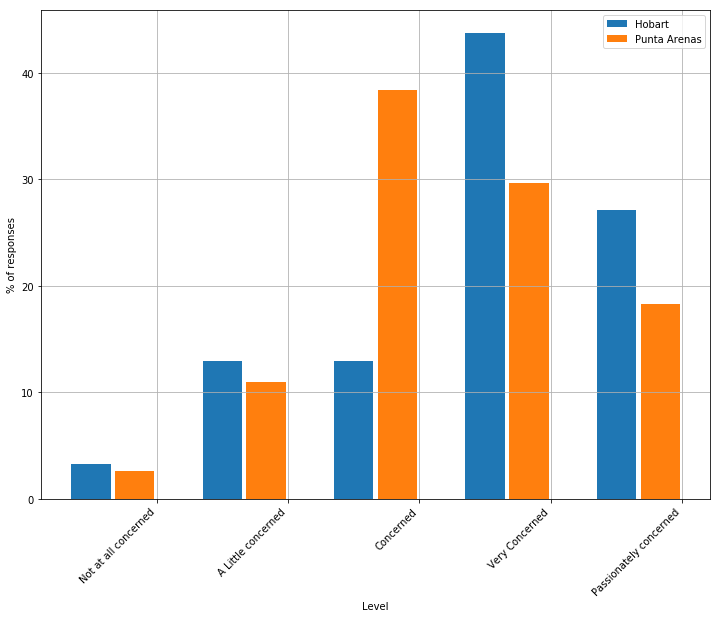

,Hobart,Punta Arenas
Not at all concerned,3.3,2.7
A Little concerned,13,11
Concerned,12.9,38.3
Very Concerned,43.7,29.7
Passionately concerned,27.1,18.3


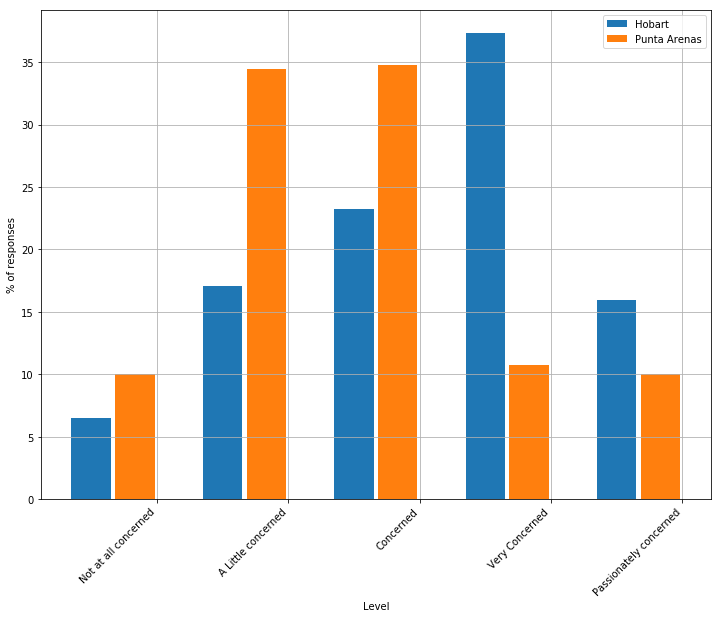

,Hobart,Punta Arenas
Not at all concerned,6.5,10
A Little concerned,17.1,34.4
Concerned,23.2,34.8
Very Concerned,37.3,10.7
Passionately concerned,15.9,10


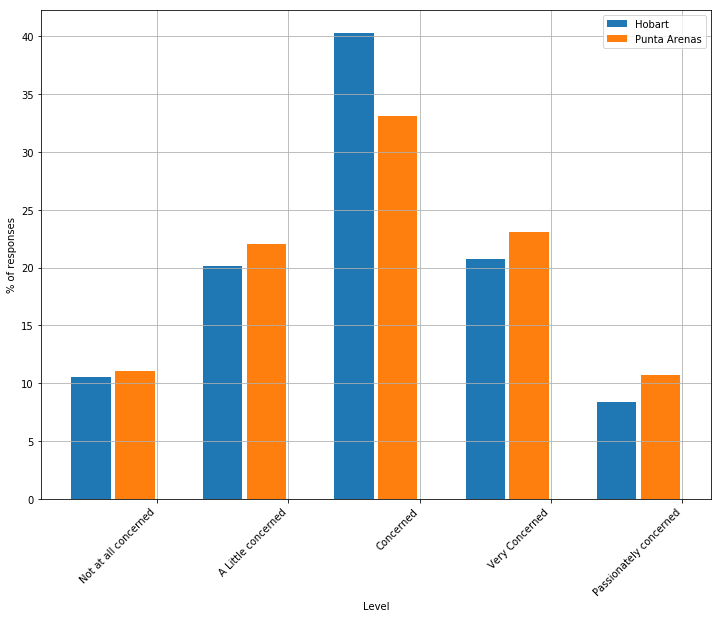

,Hobart,Punta Arenas
Not at all concerned,10.5,11
A Little concerned,20.1,22.1
Concerned,40.3,33.1
Very Concerned,20.7,23.1
Passionately concerned,8.4,10.7


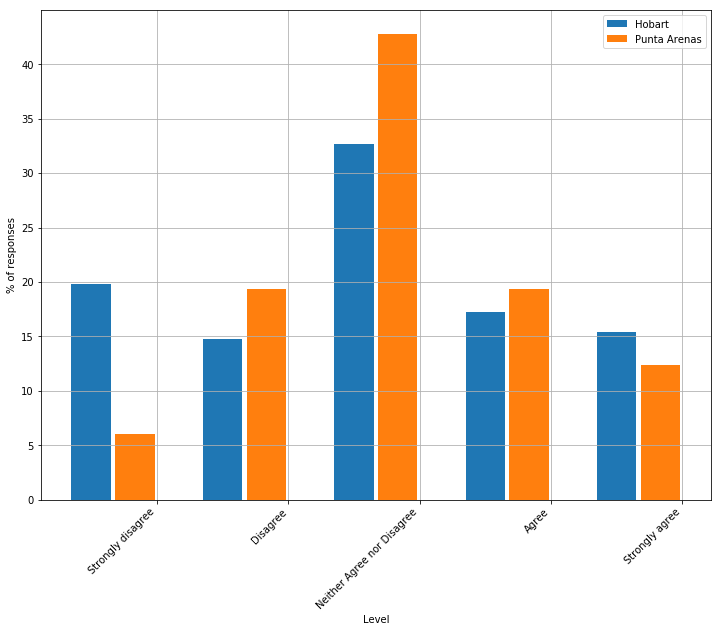

,Hobart,Punta Arenas
Strongly disagree,19.9,6
Disagree,14.7,19.4
Neither Agree nor Disagree,32.7,42.8
Agree,17.3,19.4
Strongly agree,15.4,12.4


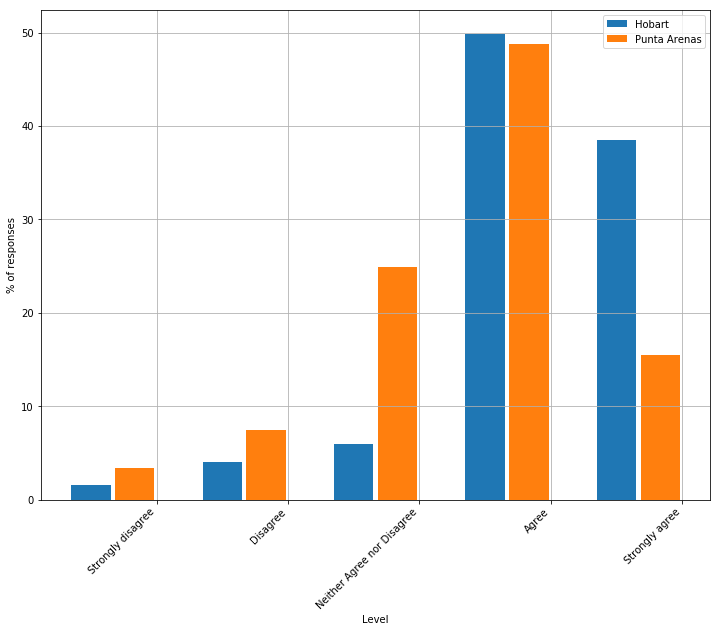

,Hobart,Punta Arenas
Strongly disagree,1.6,3.4
Disagree,4.1,7.4
Neither Agree nor Disagree,6,24.9
Agree,49.9,48.8
Strongly agree,38.5,15.5


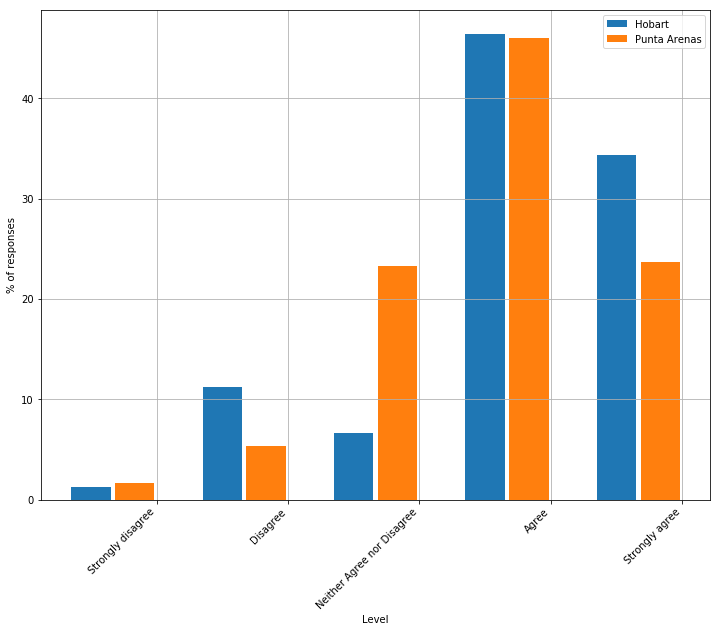

,Hobart,Punta Arenas
Strongly disagree,1.2,1.7
Disagree,11.3,5.3
Neither Agree nor Disagree,6.6,23.3
Agree,46.5,46
Strongly agree,34.4,23.7


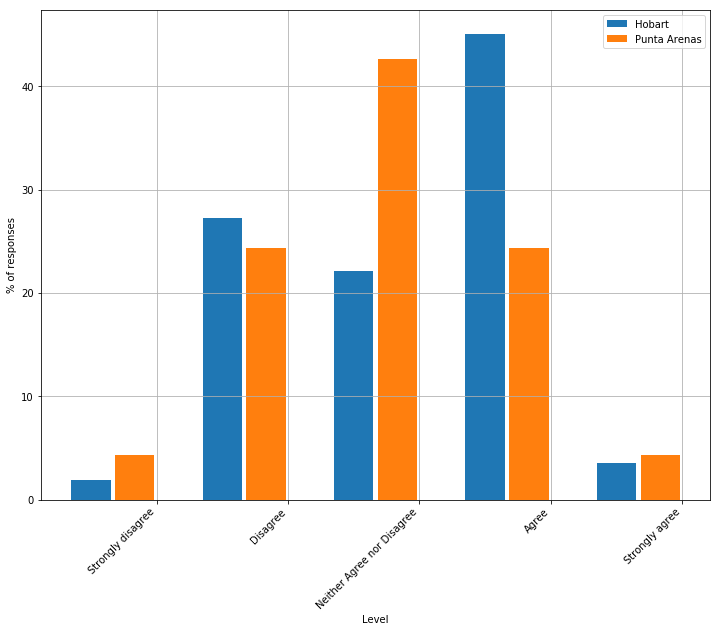

,Hobart,Punta Arenas
Strongly disagree,1.9,4.3
Disagree,27.3,24.3
Neither Agree nor Disagree,22.1,42.7
Agree,45.1,24.3
Strongly agree,3.6,4.3


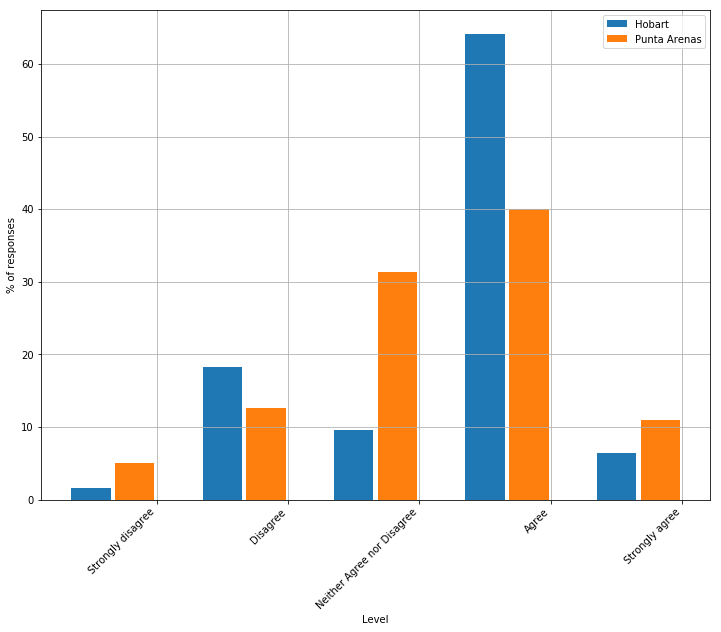

,Hobart,Punta Arenas
Strongly disagree,1.6,5
Disagree,18.2,12.7
Neither Agree nor Disagree,9.5,31.3
Agree,64.2,40
Strongly agree,6.5,11


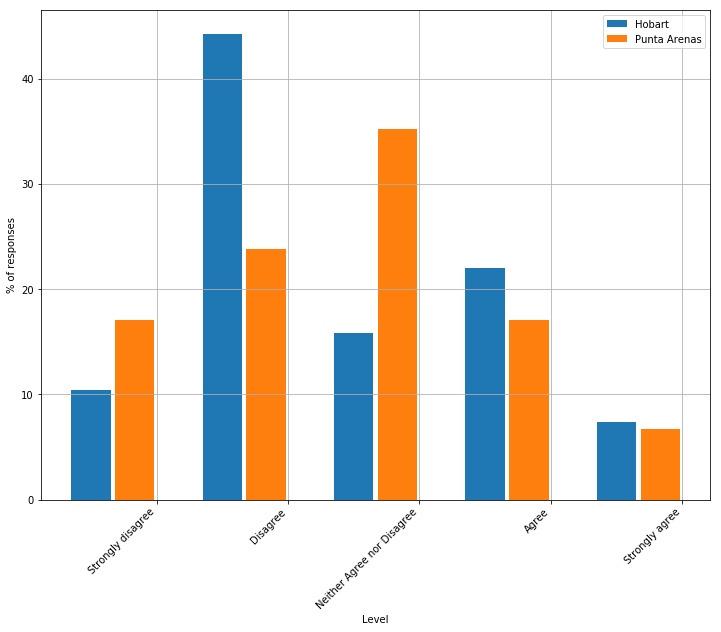

,Hobart,Punta Arenas
Strongly disagree,10.4,17.1
Disagree,44.3,23.8
Neither Agree nor Disagree,15.8,35.2
Agree,22,17.1
Strongly agree,7.4,6.7


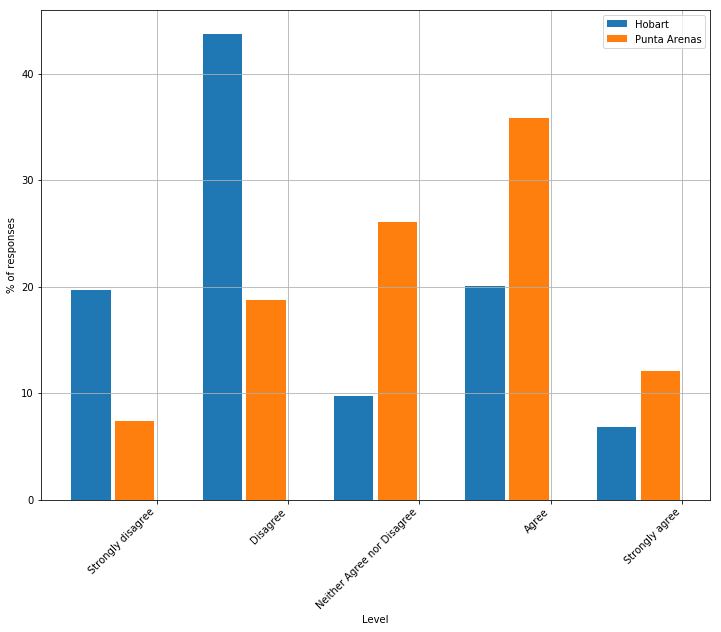

,Hobart,Punta Arenas
Strongly disagree,19.6,7.4
Disagree,43.7,18.7
Neither Agree nor Disagree,9.8,26.1
Agree,20,35.8
Strongly agree,6.8,12


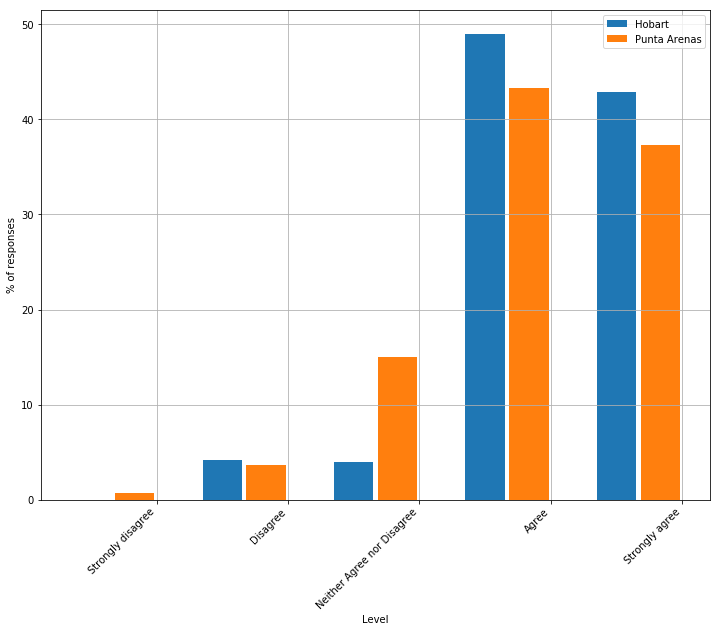

,Hobart,Punta Arenas
Strongly disagree,0,0.7
Disagree,4.2,3.7
Neither Agree nor Disagree,4,15
Agree,49,43.3
Strongly agree,42.9,37.3


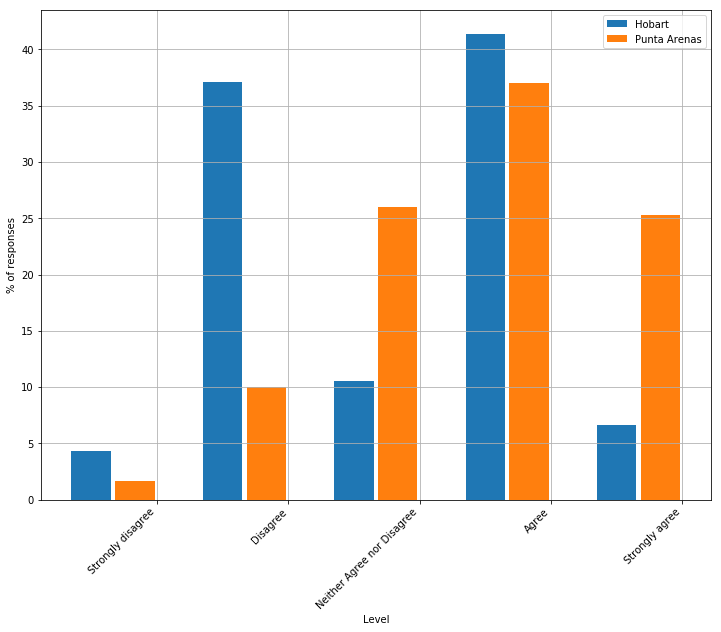

,Hobart,Punta Arenas
Strongly disagree,4.3,1.7
Disagree,37.1,10
Neither Agree nor Disagree,10.6,26
Agree,41.4,37
Strongly agree,6.6,25.3


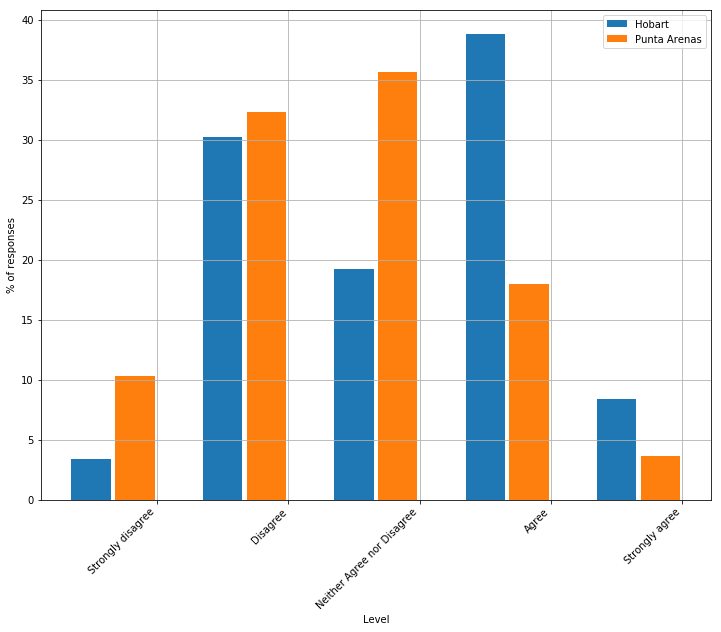

,Hobart,Punta Arenas
Strongly disagree,3.4,10.3
Disagree,30.2,32.3
Neither Agree nor Disagree,19.2,35.7
Agree,38.8,18
Strongly agree,8.4,3.7


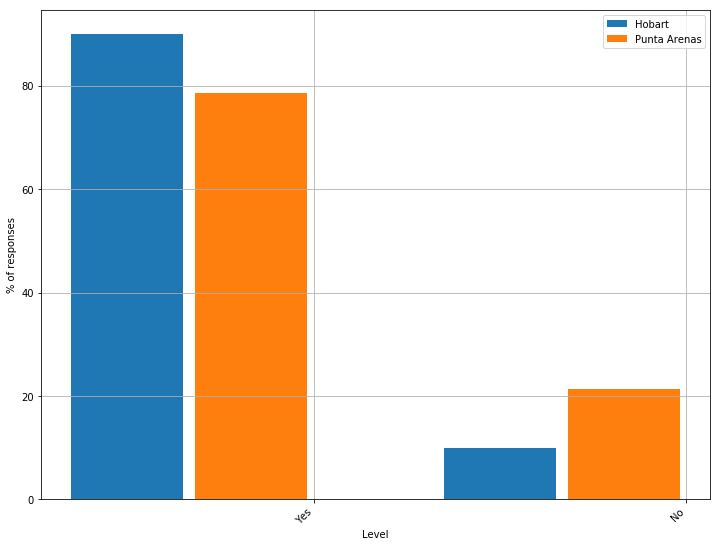

,Hobart,Punta Arenas
Yes,90.1,78.7
No,9.9,21.3


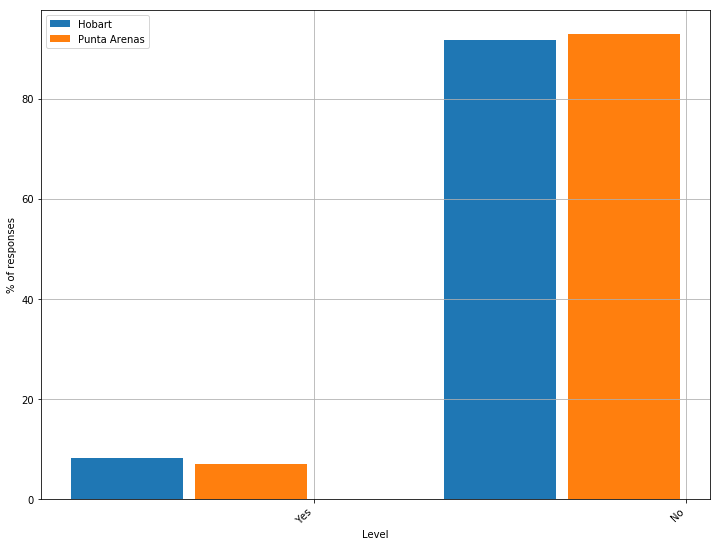

,Hobart,Punta Arenas
Yes,8.3,7
No,91.7,93


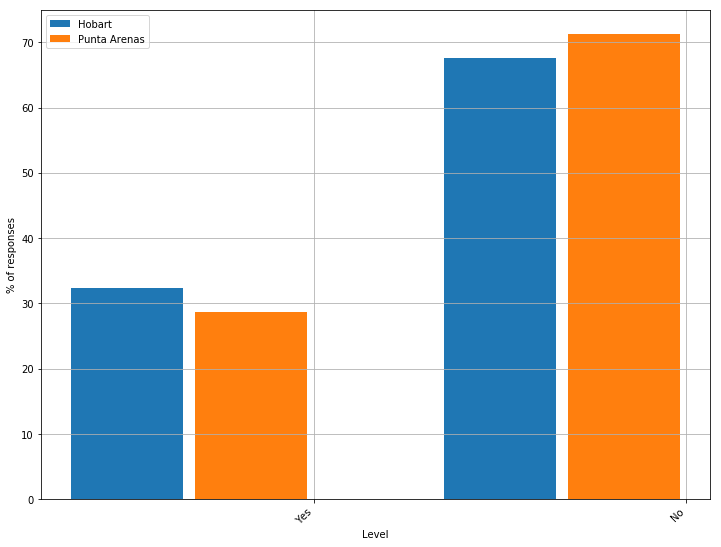

,Hobart,Punta Arenas
Yes,32.4,28.7
No,67.6,71.3


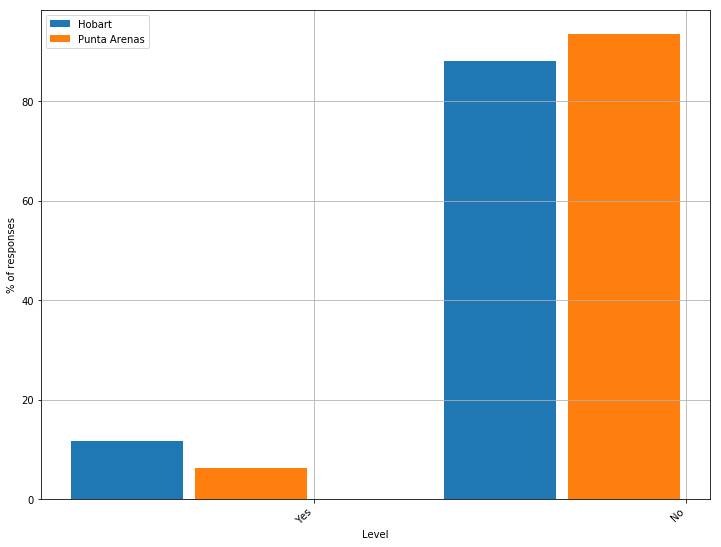

,Hobart,Punta Arenas
Yes,11.8,6.3
No,88.2,93.7


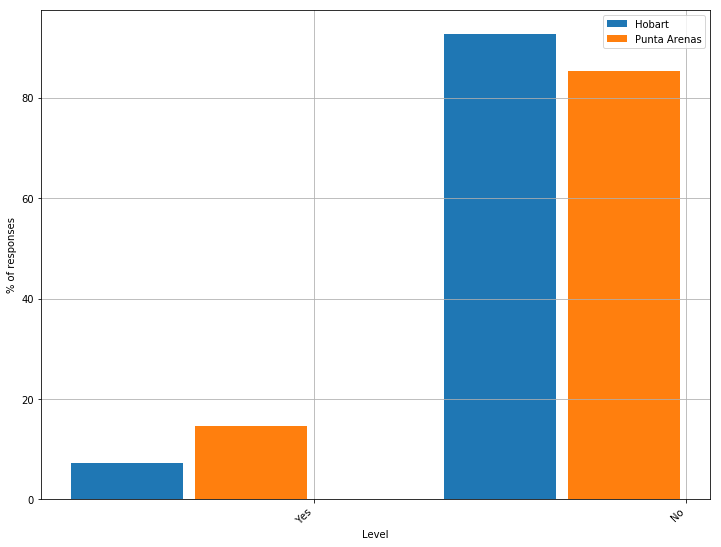

,Hobart,Punta Arenas
Yes,7.2,14.7
No,92.8,85.3


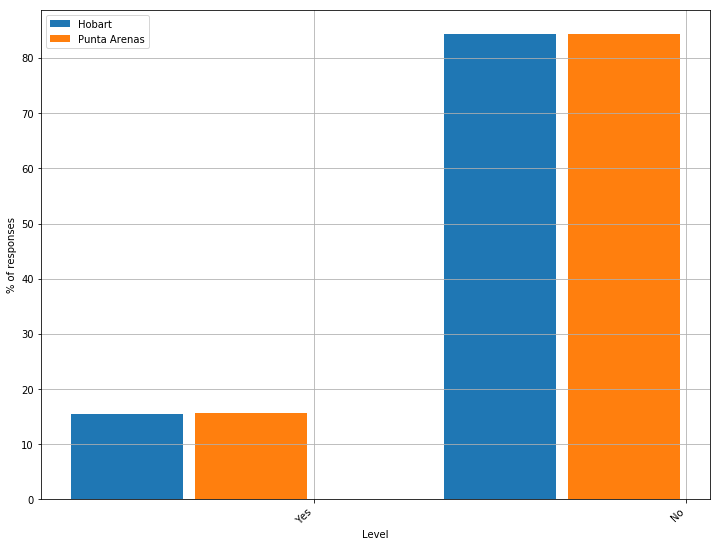

,Hobart,Punta Arenas
Yes,15.6,15.7
No,84.4,84.3


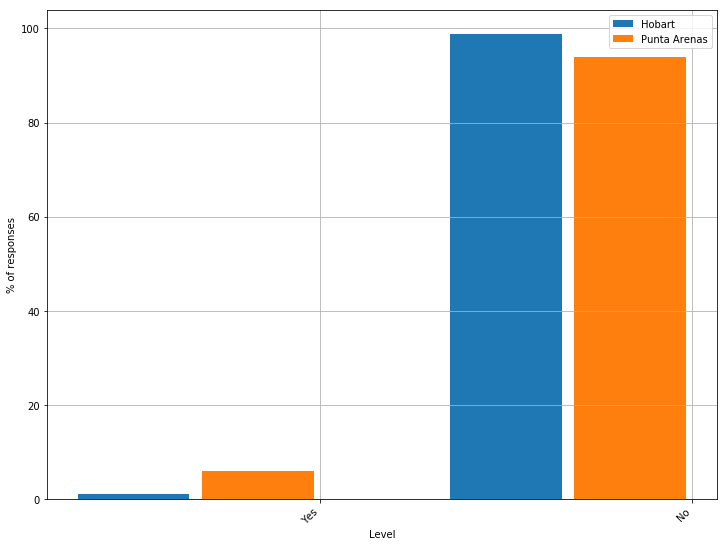

,Hobart,Punta Arenas
Yes,1.1,6
No,98.9,94


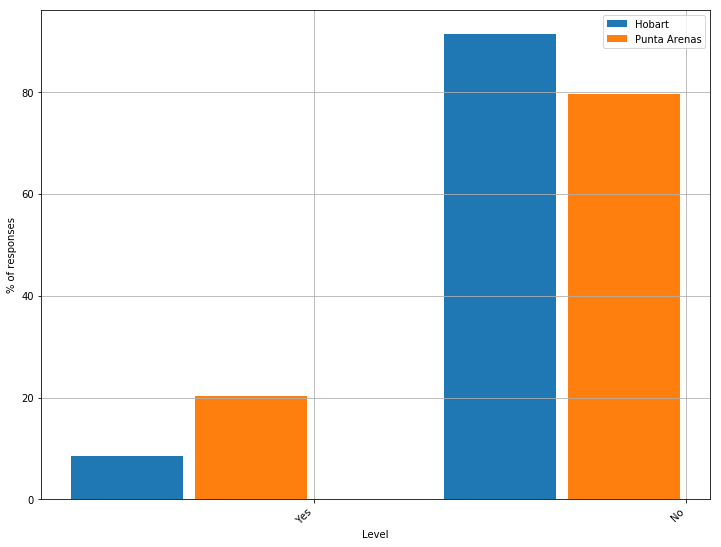

,Hobart,Punta Arenas
Yes,8.5,20.3
No,91.5,79.7


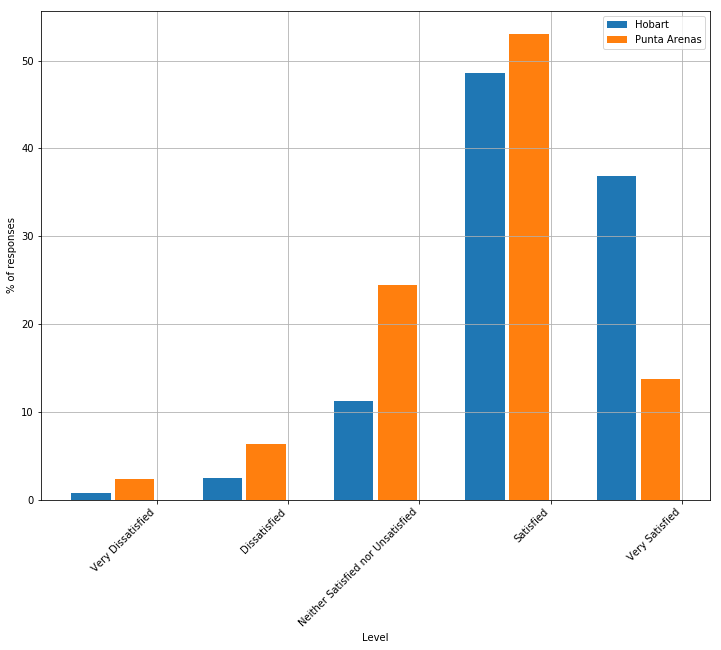

,Hobart,Punta Arenas
Very Dissatisfied,0.7,2.3
Dissatisfied,2.5,6.4
Neither Satisfied nor Unsatisfied,11.3,24.5
Satisfied,48.6,53
Very Satisfied,36.8,13.8


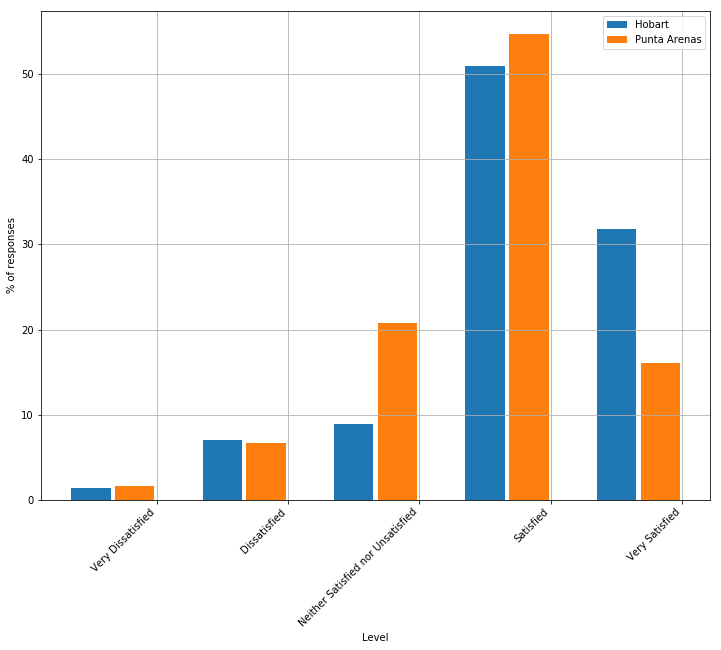

,Hobart,Punta Arenas
Very Dissatisfied,1.4,1.7
Dissatisfied,7,6.7
Neither Satisfied nor Unsatisfied,8.9,20.8
Satisfied,51,54.7
Very Satisfied,31.7,16.1


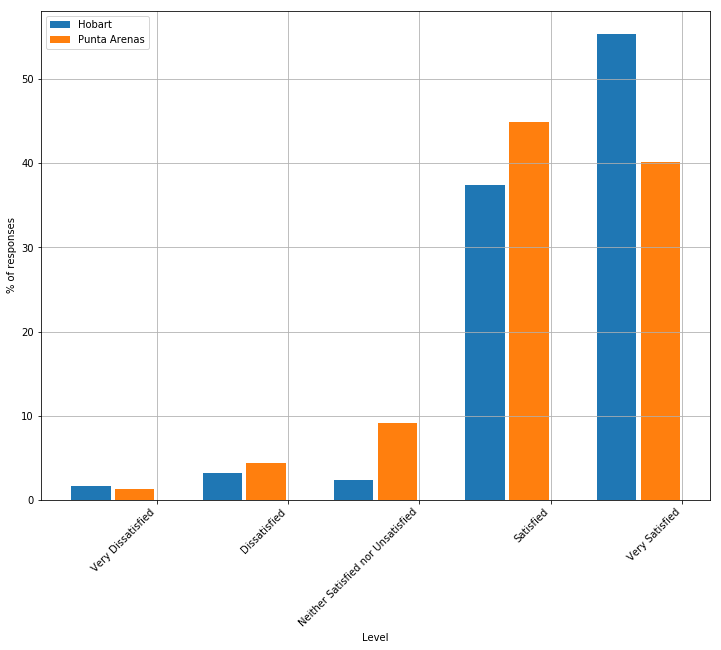

,Hobart,Punta Arenas
Very Dissatisfied,1.6,1.4
Dissatisfied,3.2,4.4
Neither Satisfied nor Unsatisfied,2.4,9.1
Satisfied,37.4,44.9
Very Satisfied,55.4,40.2


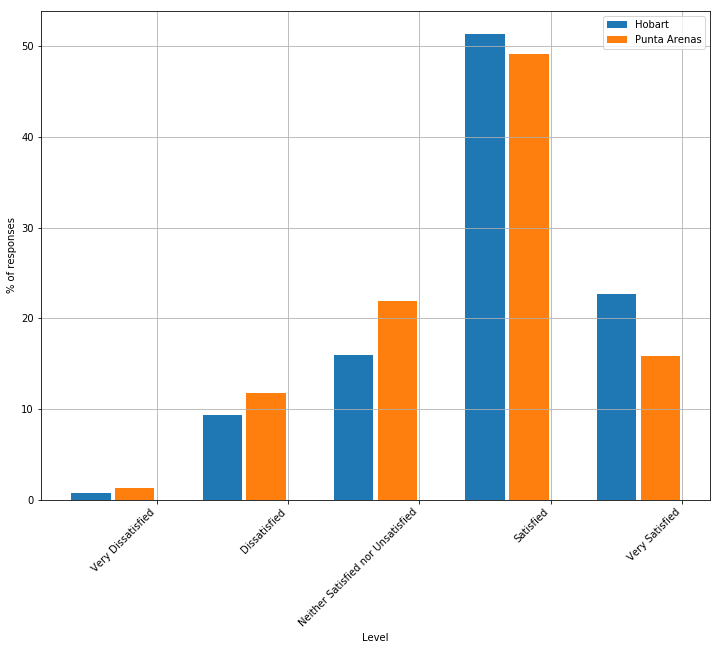

,Hobart,Punta Arenas
Very Dissatisfied,0.7,1.3
Dissatisfied,9.3,11.8
Neither Satisfied nor Unsatisfied,16,21.9
Satisfied,51.3,49.2
Very Satisfied,22.7,15.8


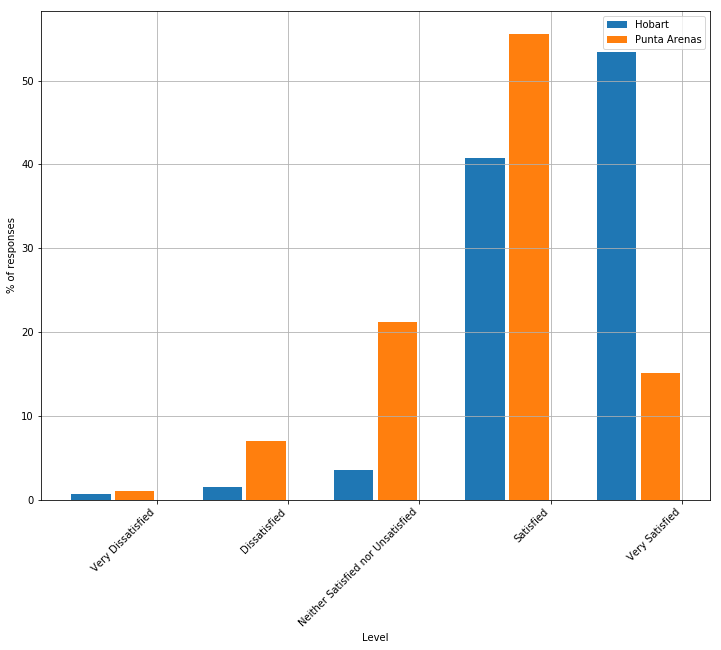

,Hobart,Punta Arenas
Very Dissatisfied,0.6,1
Dissatisfied,1.6,7.1
Neither Satisfied nor Unsatisfied,3.6,21.2
Satisfied,40.8,55.6
Very Satisfied,53.4,15.2


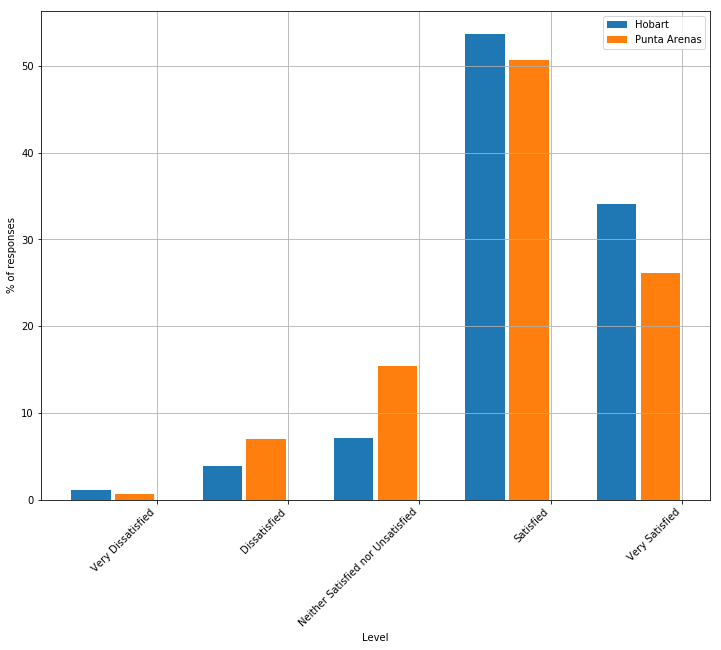

,Hobart,Punta Arenas
Very Dissatisfied,1.1,0.7
Dissatisfied,3.9,7
Neither Satisfied nor Unsatisfied,7.2,15.4
Satisfied,53.7,50.7
Very Satisfied,34.1,26.2


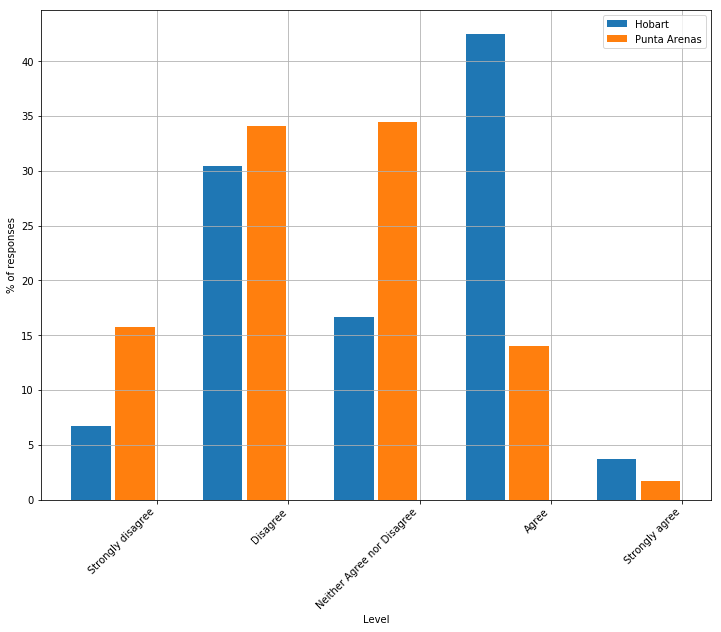

,Hobart,Punta Arenas
Strongly disagree,6.7,15.7
Disagree,30.5,34.1
Neither Agree nor Disagree,16.6,34.4
Agree,42.5,14
Strongly agree,3.7,1.7


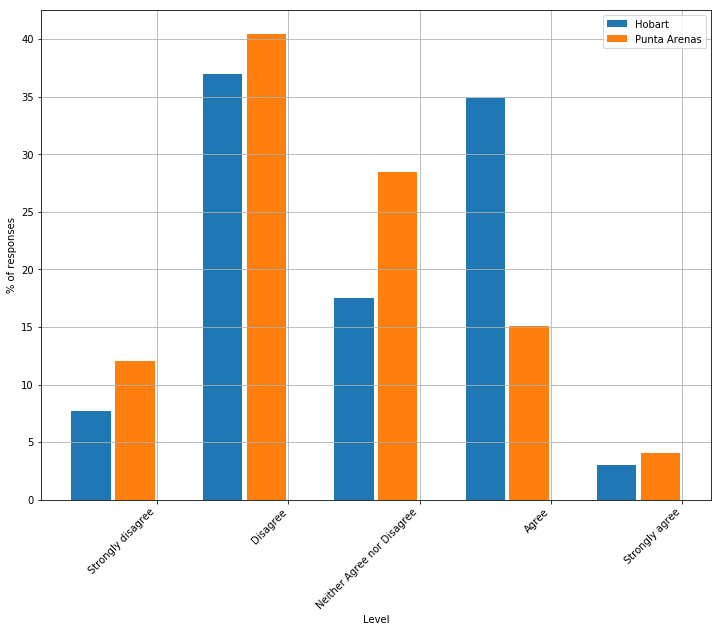

,Hobart,Punta Arenas
Strongly disagree,7.7,12
Disagree,37,40.5
Neither Agree nor Disagree,17.5,28.4
Agree,34.8,15.1
Strongly agree,3,4


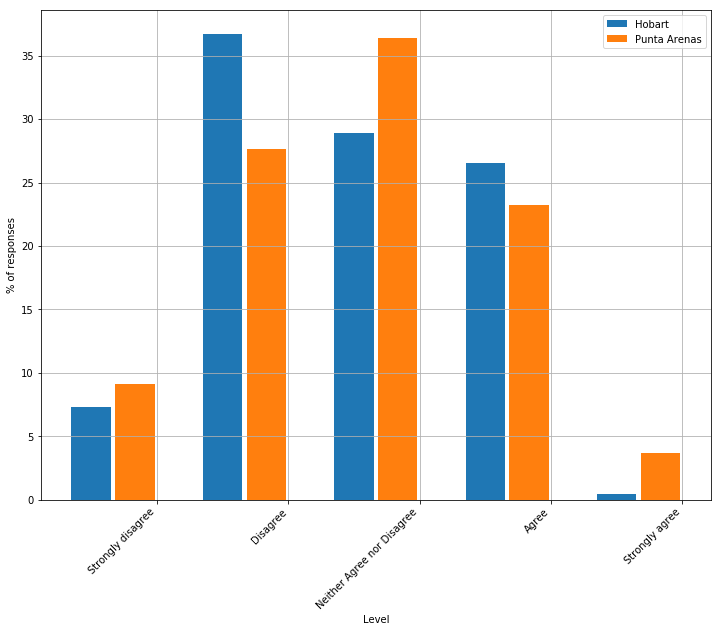

,Hobart,Punta Arenas
Strongly disagree,7.3,9.1
Disagree,36.7,27.6
Neither Agree nor Disagree,28.9,36.4
Agree,26.5,23.2
Strongly agree,0.5,3.7


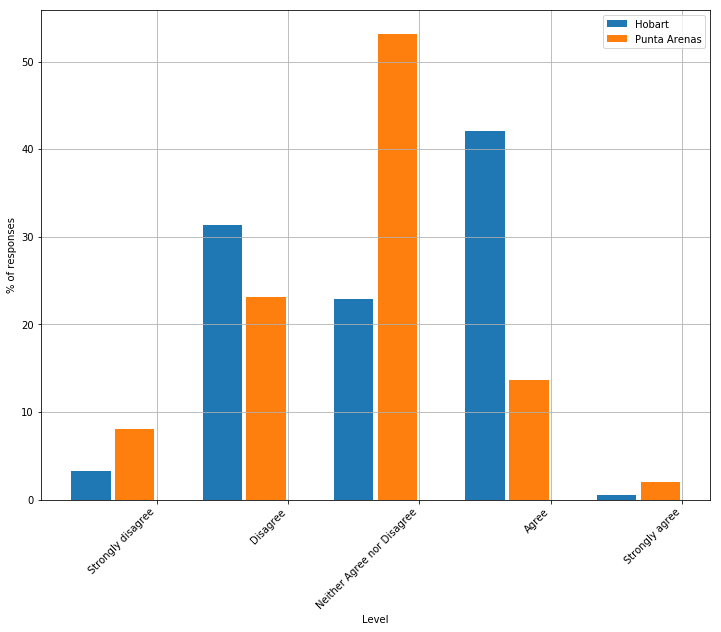

,Hobart,Punta Arenas
Strongly disagree,3.2,8
Disagree,31.3,23.1
Neither Agree nor Disagree,22.9,53.2
Agree,42,13.7
Strongly agree,0.5,2


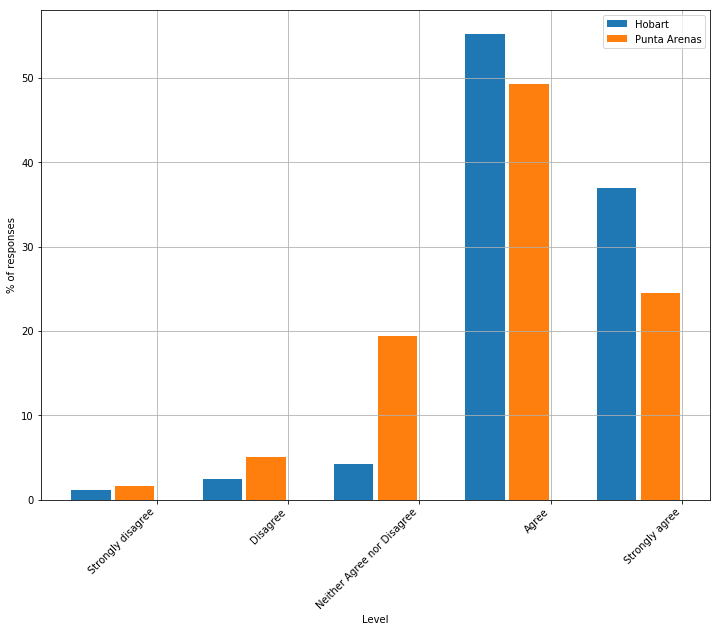

,Hobart,Punta Arenas
Strongly disagree,1.2,1.7
Disagree,2.4,5
Neither Agree nor Disagree,4.3,19.5
Agree,55.2,49.3
Strongly agree,36.9,24.5


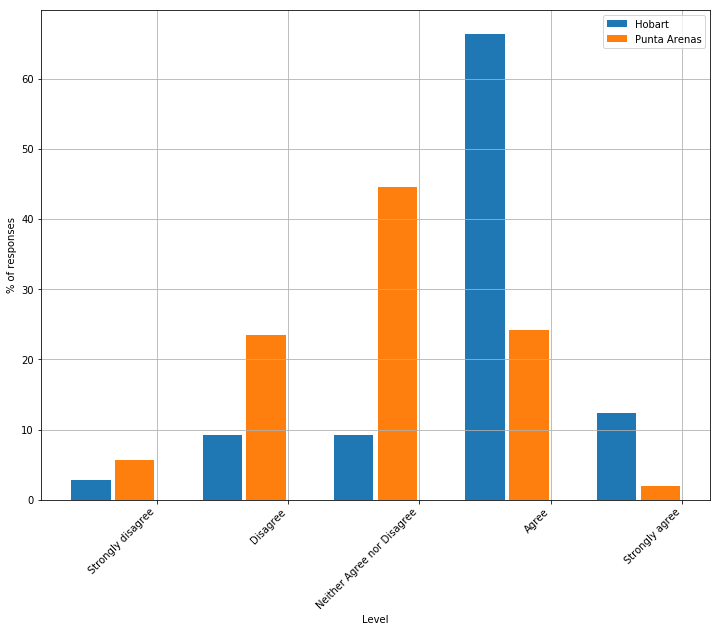

,Hobart,Punta Arenas
Strongly disagree,2.8,5.7
Disagree,9.3,23.5
Neither Agree nor Disagree,9.2,44.6
Agree,66.4,24.2
Strongly agree,12.3,2


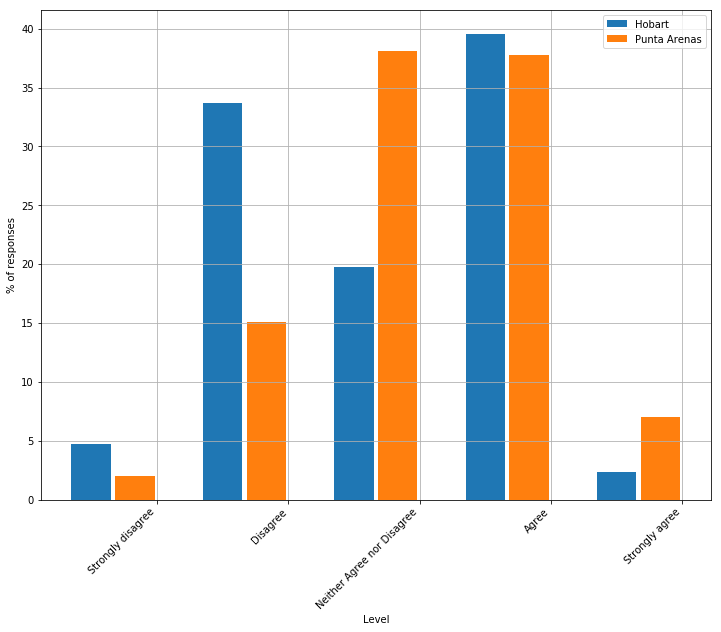

,Hobart,Punta Arenas
Strongly disagree,4.7,2
Disagree,33.7,15.1
Neither Agree nor Disagree,19.8,38.1
Agree,39.6,37.8
Strongly agree,2.3,7


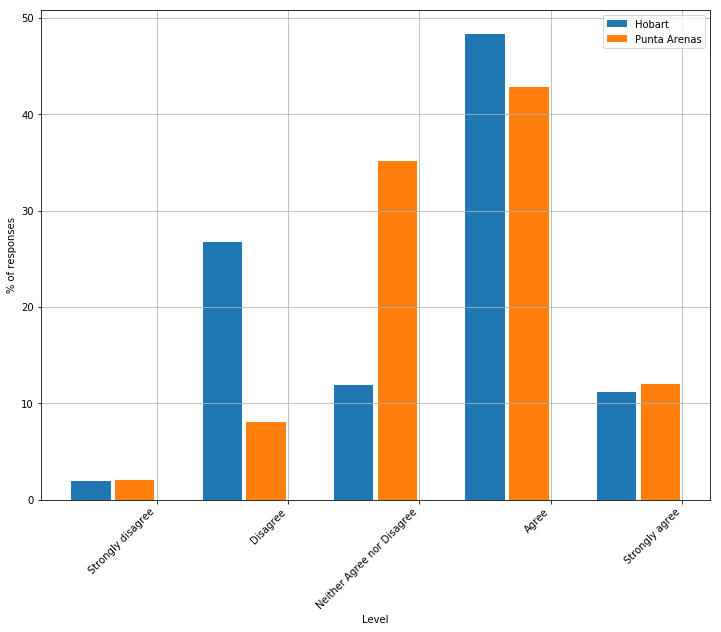

,Hobart,Punta Arenas
Strongly disagree,1.9,2
Disagree,26.7,8
Neither Agree nor Disagree,11.9,35.1
Agree,48.4,42.8
Strongly agree,11.1,12


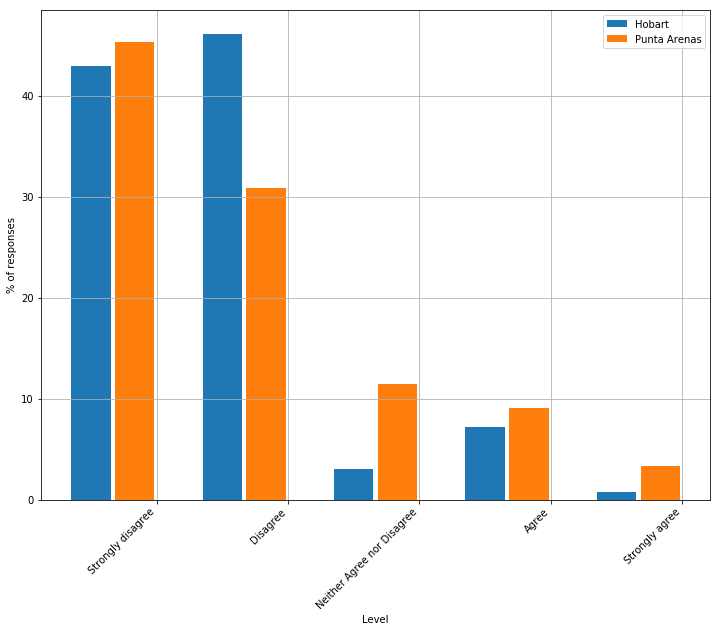

,Hobart,Punta Arenas
Strongly disagree,42.9,45.3
Disagree,46.1,30.9
Neither Agree nor Disagree,3,11.4
Agree,7.1,9.1
Strongly agree,0.7,3.4


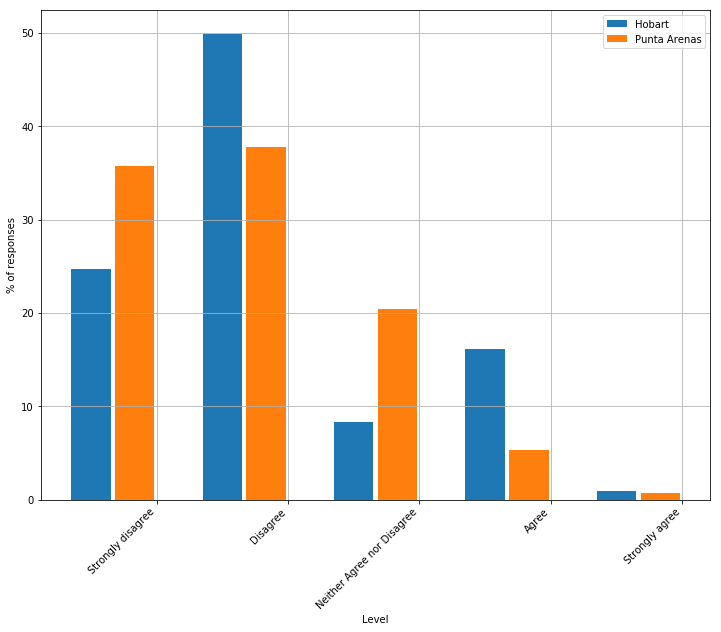

,Hobart,Punta Arenas
Strongly disagree,24.7,35.8
Disagree,49.9,37.8
Neither Agree nor Disagree,8.3,20.4
Agree,16.2,5.4
Strongly agree,0.9,0.7


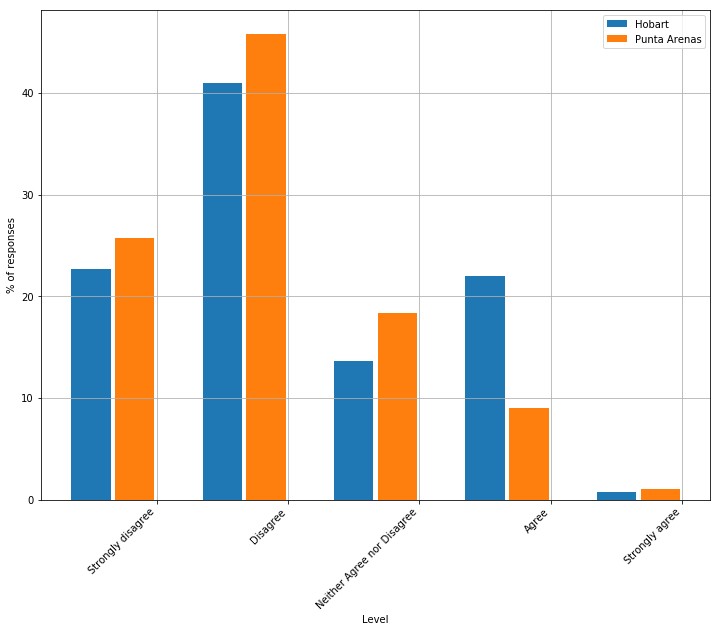

,Hobart,Punta Arenas
Strongly disagree,22.7,25.8
Disagree,41,45.8
Neither Agree nor Disagree,13.7,18.4
Agree,22,9
Strongly agree,0.7,1


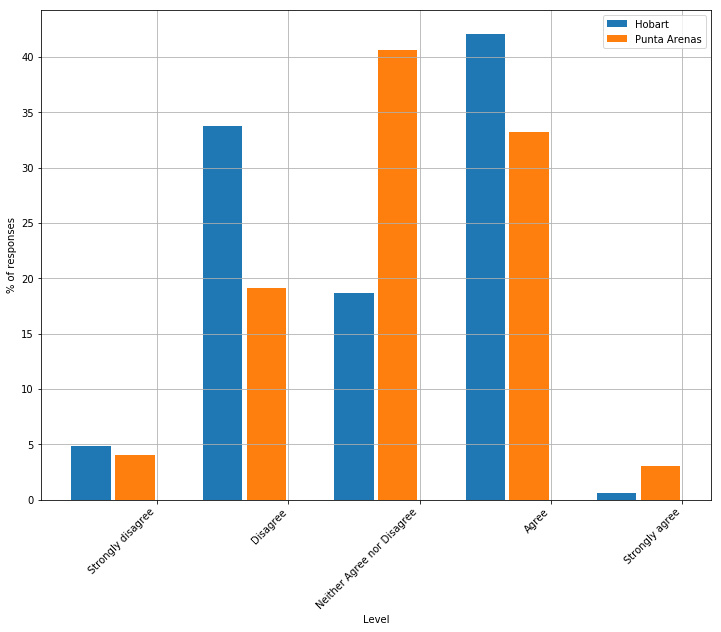

,Hobart,Punta Arenas
Strongly disagree,4.8,4
Disagree,33.8,19.1
Neither Agree nor Disagree,18.7,40.6
Agree,42.1,33.2
Strongly agree,0.6,3


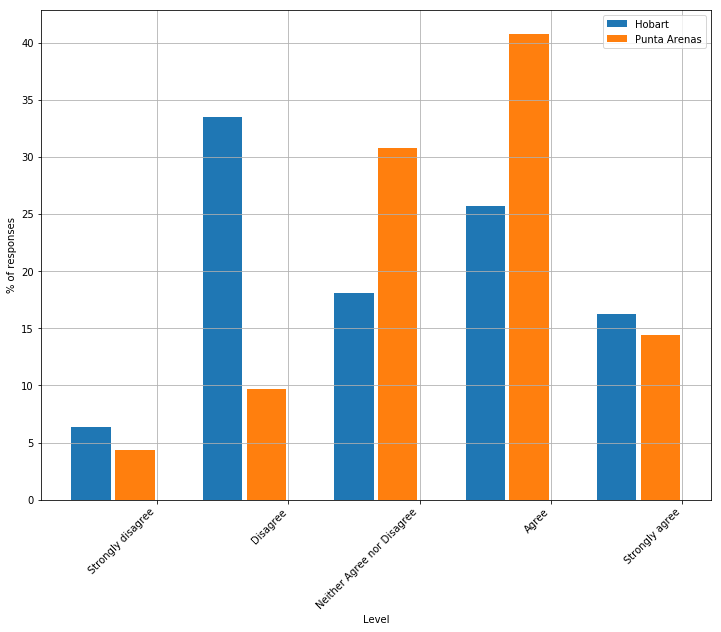

,Hobart,Punta Arenas
Strongly disagree,6.4,4.3
Disagree,33.5,9.7
Neither Agree nor Disagree,18.1,30.8
Agree,25.7,40.8
Strongly agree,16.2,14.4


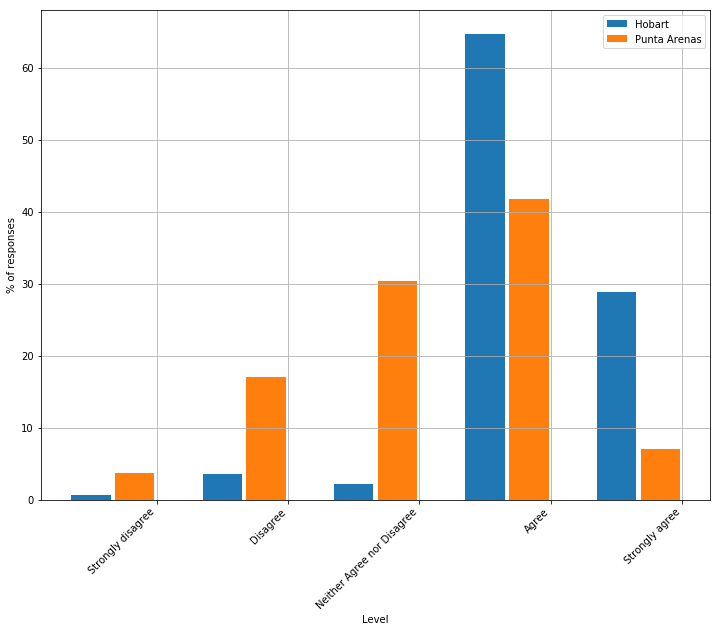

,Hobart,Punta Arenas
Strongly disagree,0.6,3.7
Disagree,3.6,17.1
Neither Agree nor Disagree,2.2,30.4
Agree,64.8,41.8
Strongly agree,28.9,7


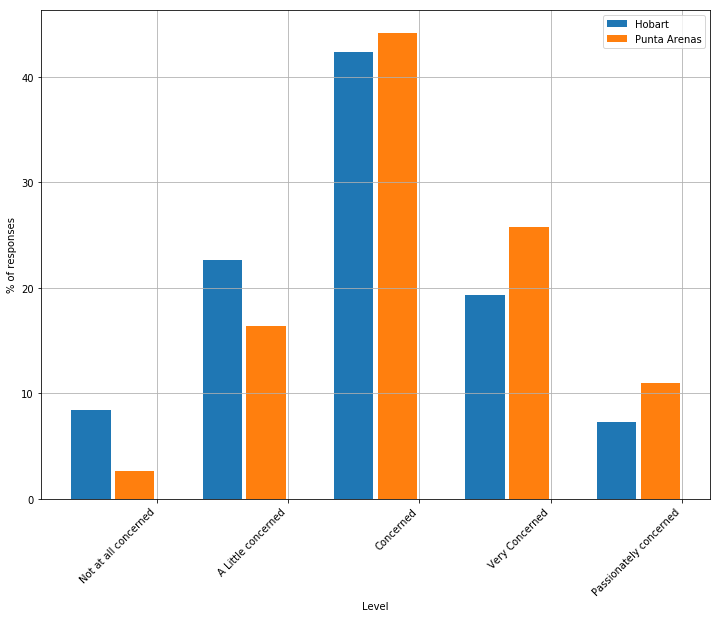

,Hobart,Punta Arenas
Not at all concerned,8.4,2.7
A Little concerned,22.7,16.4
Concerned,42.3,44.1
Very Concerned,19.3,25.8
Passionately concerned,7.3,11


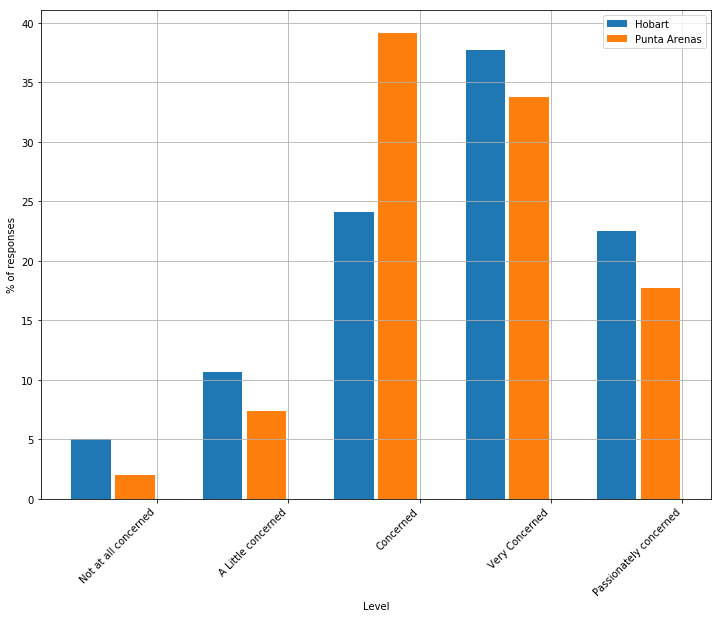

,Hobart,Punta Arenas
Not at all concerned,5,2
A Little concerned,10.7,7.4
Concerned,24.1,39.1
Very Concerned,37.7,33.8
Passionately concerned,22.5,17.7


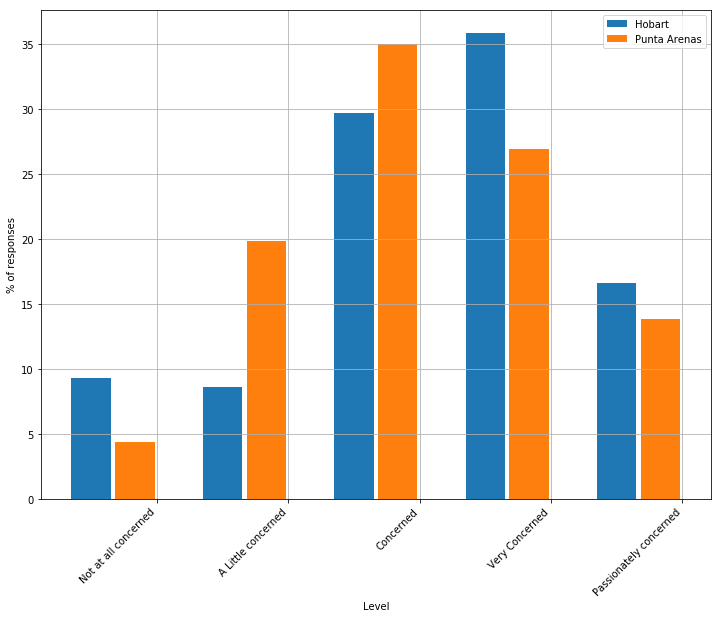

,Hobart,Punta Arenas
Not at all concerned,9.3,4.4
A Little concerned,8.6,19.9
Concerned,29.7,35
Very Concerned,35.8,26.9
Passionately concerned,16.6,13.8


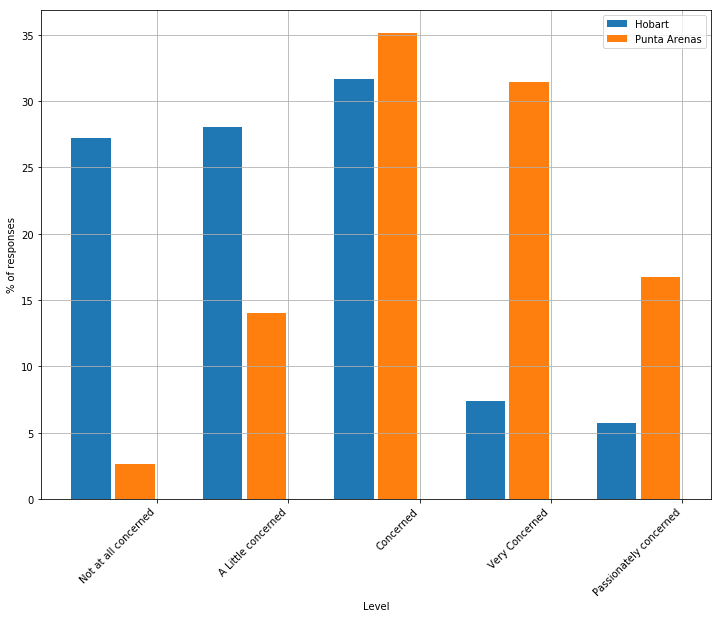

,Hobart,Punta Arenas
Not at all concerned,27.2,2.7
A Little concerned,28,14
Concerned,31.7,35.1
Very Concerned,7.4,31.4
Passionately concerned,5.7,16.7


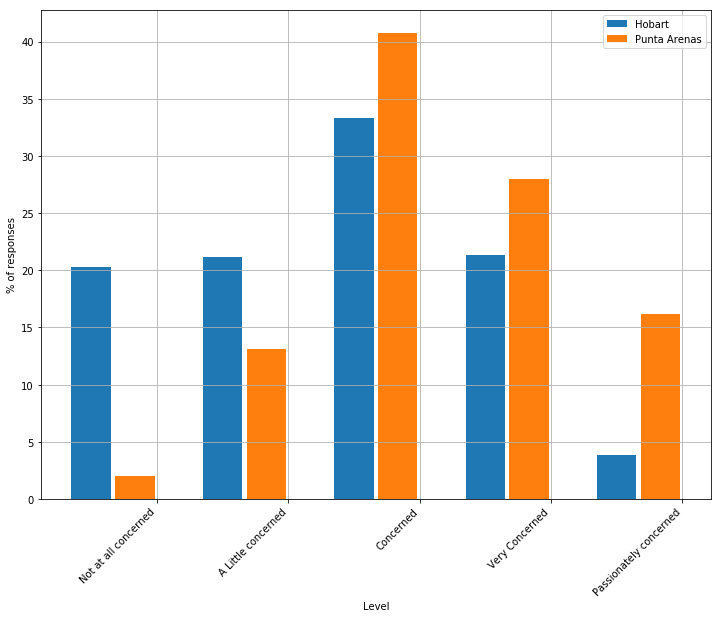

,Hobart,Punta Arenas
Not at all concerned,20.3,2
A Little concerned,21.2,13.1
Concerned,33.3,40.7
Very Concerned,21.3,27.9
Passionately concerned,3.9,16.2


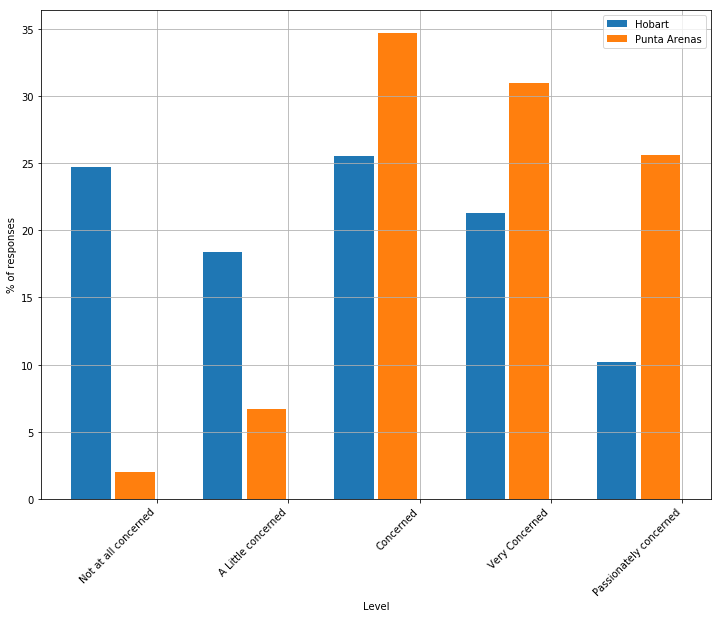

,Hobart,Punta Arenas
Not at all concerned,24.7,2
A Little concerned,18.4,6.7
Concerned,25.5,34.7
Very Concerned,21.3,31
Passionately concerned,10.2,25.6


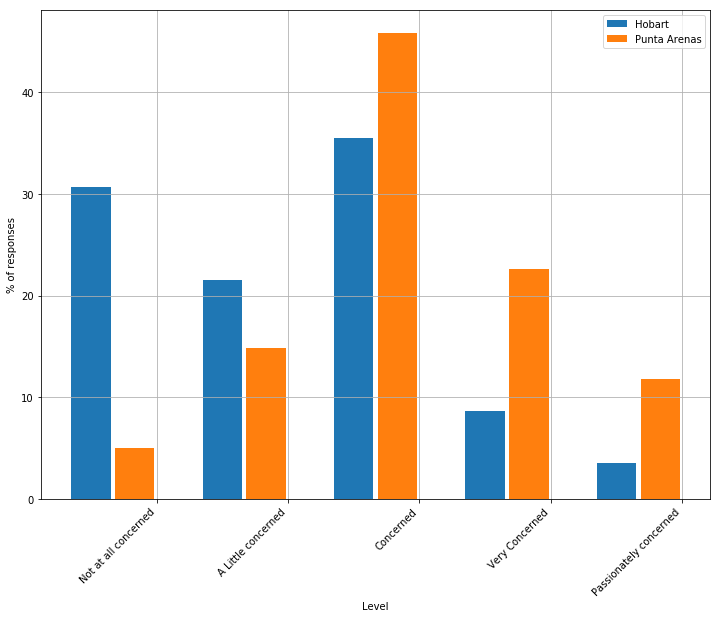

,Hobart,Punta Arenas
Not at all concerned,30.7,5.1
A Little concerned,21.5,14.8
Concerned,35.5,45.8
Very Concerned,8.7,22.6
Passionately concerned,3.6,11.8


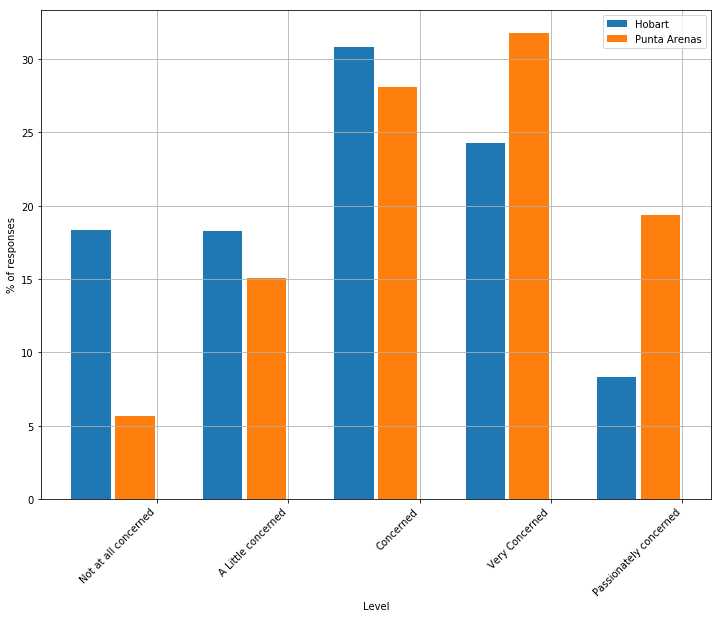

,Hobart,Punta Arenas
Not at all concerned,18.3,5.7
A Little concerned,18.3,15.1
Concerned,30.8,28.1
Very Concerned,24.3,31.8
Passionately concerned,8.3,19.4


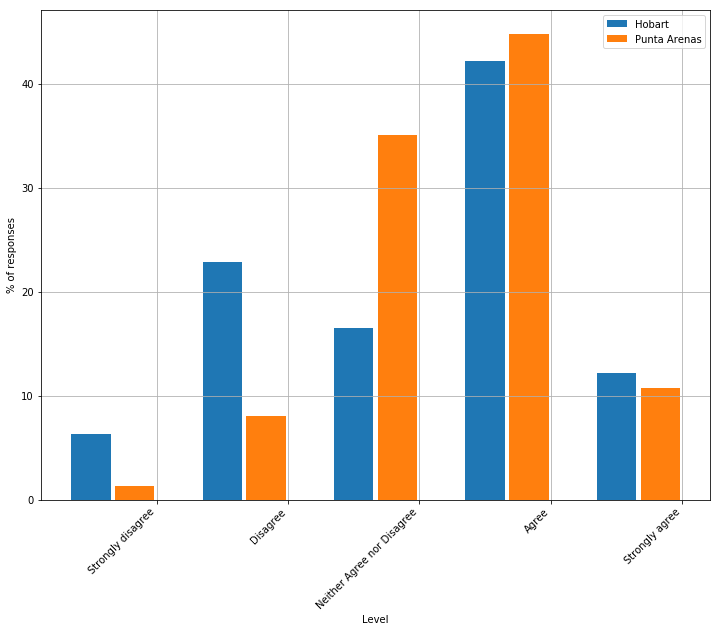

,Hobart,Punta Arenas
Strongly disagree,6.3,1.3
Disagree,22.8,8
Neither Agree nor Disagree,16.5,35.1
Agree,42.2,44.8
Strongly agree,12.1,10.7


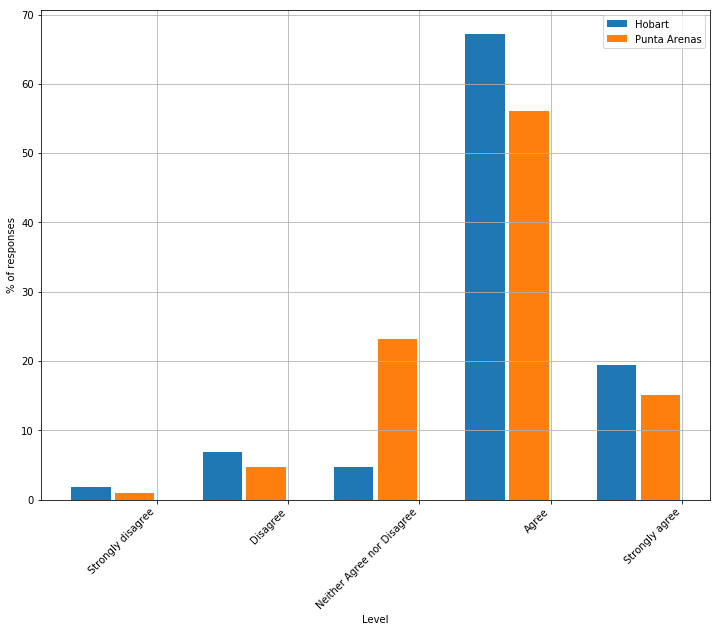

,Hobart,Punta Arenas
Strongly disagree,1.8,1
Disagree,6.9,4.7
Neither Agree nor Disagree,4.6,23.2
Agree,67.2,56
Strongly agree,19.4,15.1


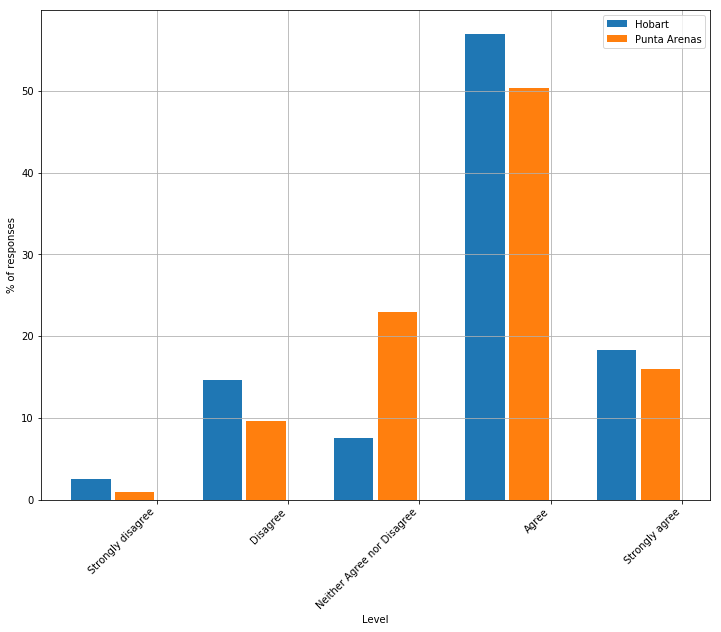

,Hobart,Punta Arenas
Strongly disagree,2.5,1
Disagree,14.7,9.7
Neither Agree nor Disagree,7.5,23
Agree,57,50.3
Strongly agree,18.3,16


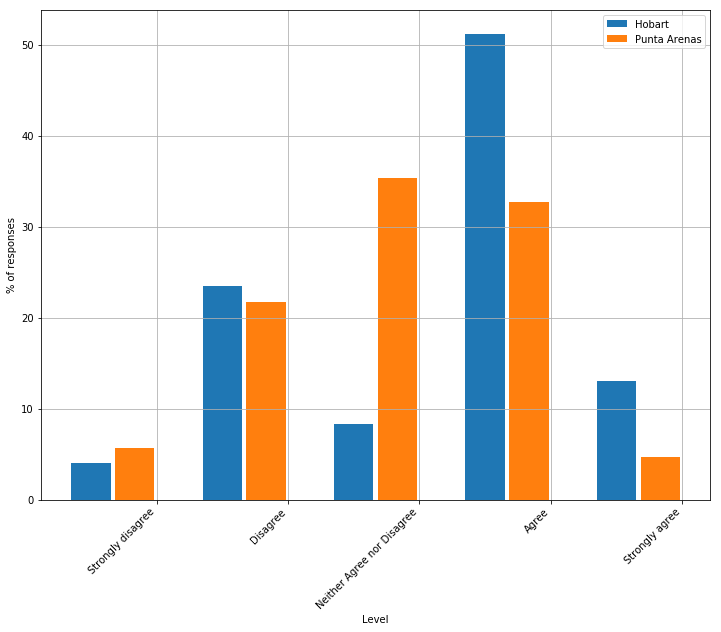

,Hobart,Punta Arenas
Strongly disagree,4,5.7
Disagree,23.5,21.7
Neither Agree nor Disagree,8.3,35.3
Agree,51.2,32.7
Strongly agree,13,4.7


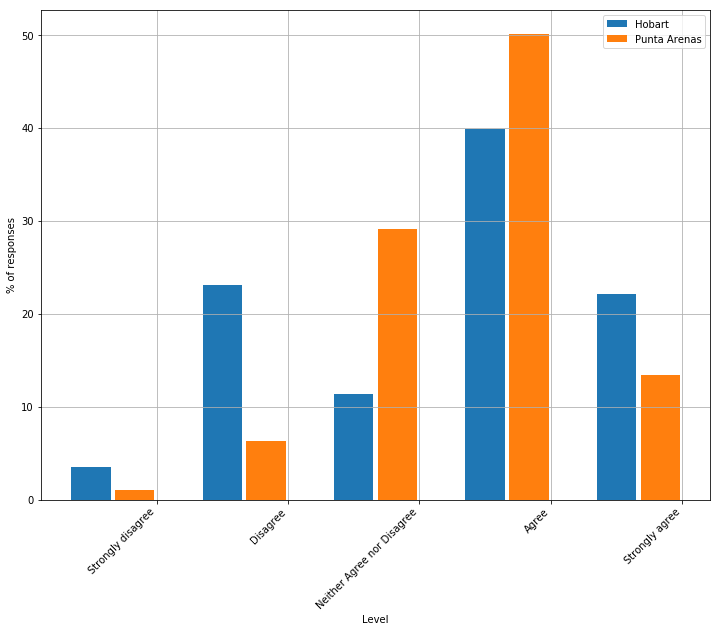

,Hobart,Punta Arenas
Strongly disagree,3.5,1
Disagree,23.1,6.4
Neither Agree nor Disagree,11.3,29.1
Agree,39.9,50.2
Strongly agree,22.2,13.4


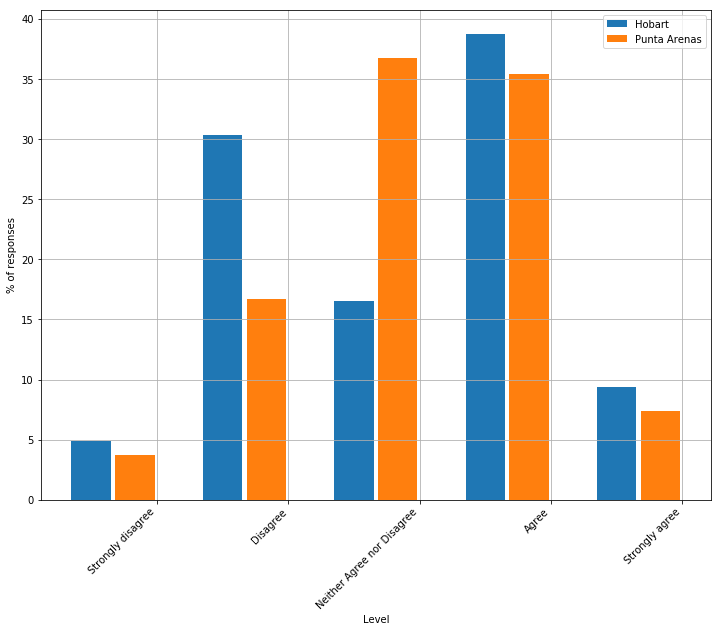

,Hobart,Punta Arenas
Strongly disagree,4.9,3.7
Disagree,30.4,16.7
Neither Agree nor Disagree,16.5,36.8
Agree,38.8,35.5
Strongly agree,9.4,7.4


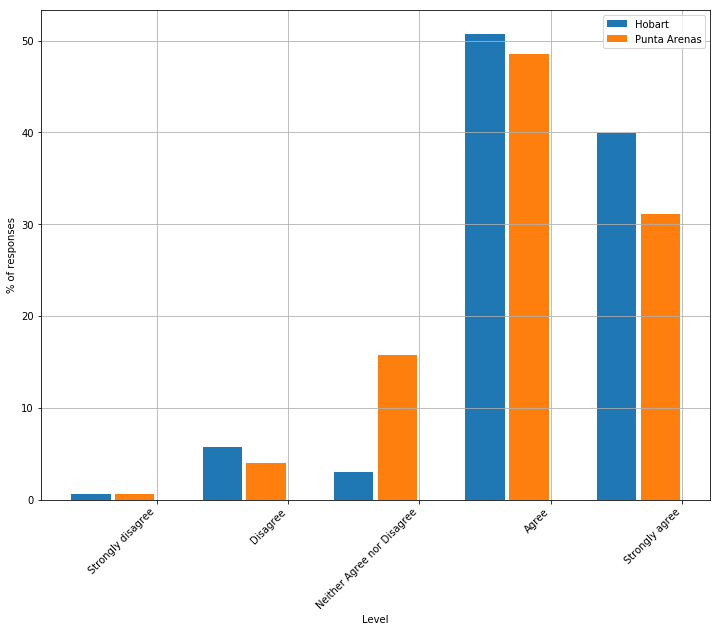

,Hobart,Punta Arenas
Strongly disagree,0.6,0.7
Disagree,5.7,4
Neither Agree nor Disagree,3,15.7
Agree,50.8,48.5
Strongly agree,39.9,31.1


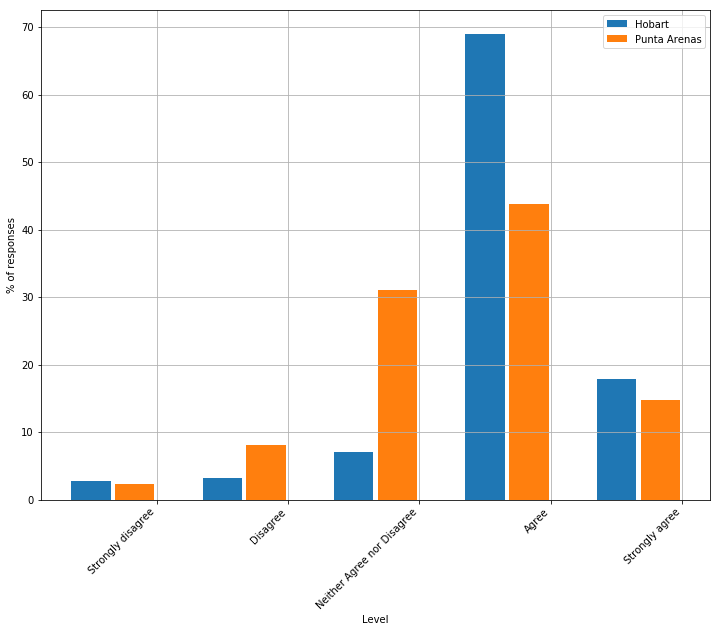

,Hobart,Punta Arenas
Strongly disagree,2.8,2.3
Disagree,3.2,8
Neither Agree nor Disagree,7,31.1
Agree,69,43.8
Strongly agree,17.9,14.7


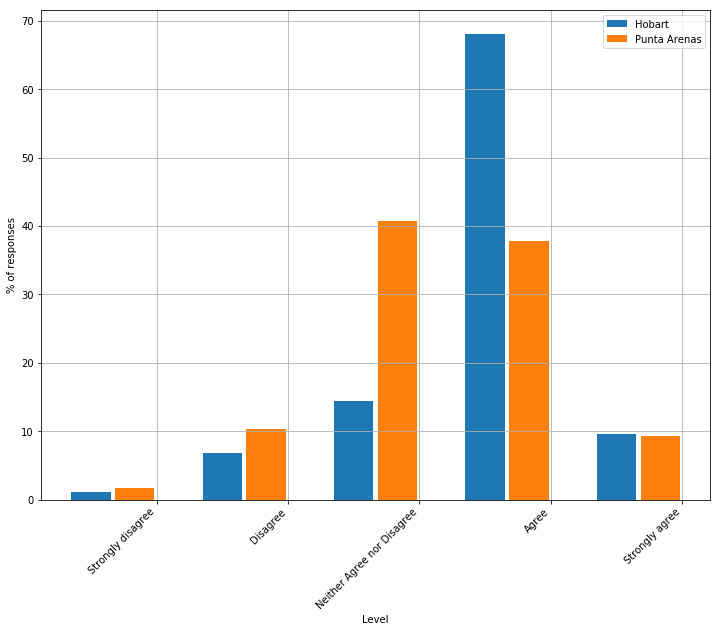

,Hobart,Punta Arenas
Strongly disagree,1.1,1.7
Disagree,6.8,10.4
Neither Agree nor Disagree,14.4,40.8
Agree,68.1,37.8
Strongly agree,9.6,9.4


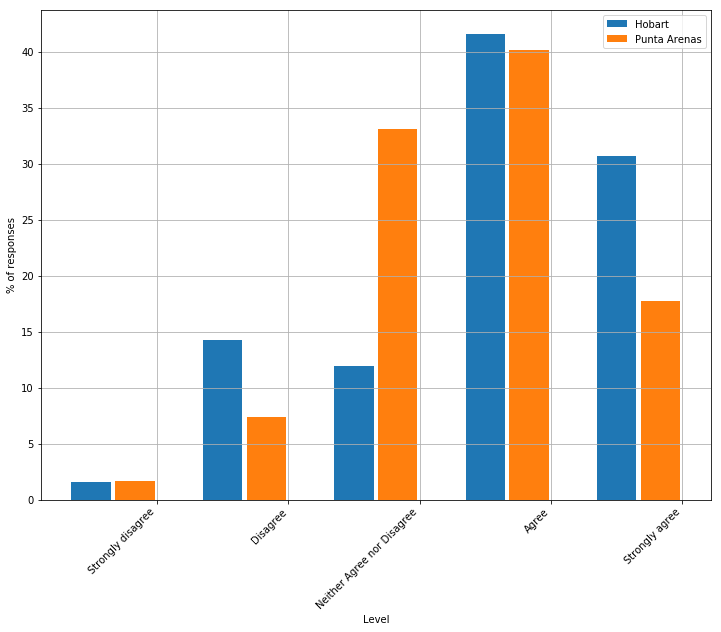

,Hobart,Punta Arenas
Strongly disagree,1.6,1.7
Disagree,14.2,7.4
Neither Agree nor Disagree,11.9,33.1
Agree,41.6,40.1
Strongly agree,30.7,17.7


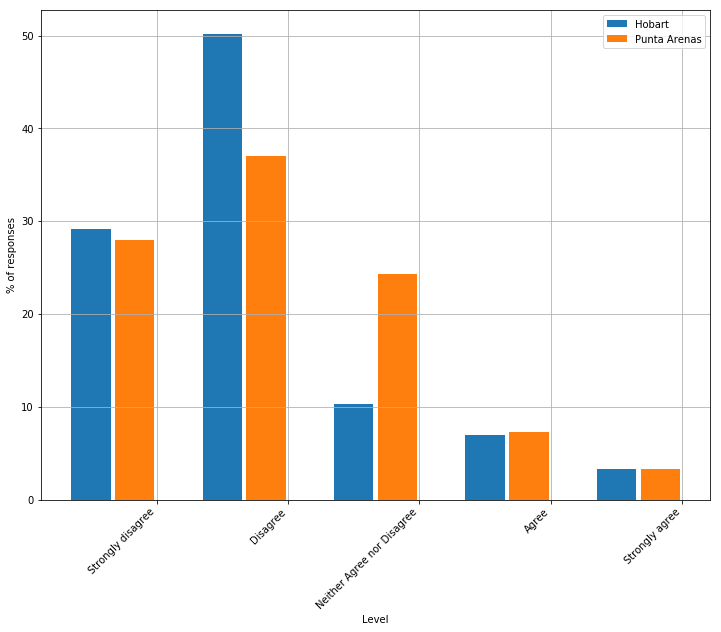

,Hobart,Punta Arenas
Strongly disagree,29.2,28
Disagree,50.2,37
Neither Agree nor Disagree,10.3,24.3
Agree,7,7.3
Strongly agree,3.3,3.3


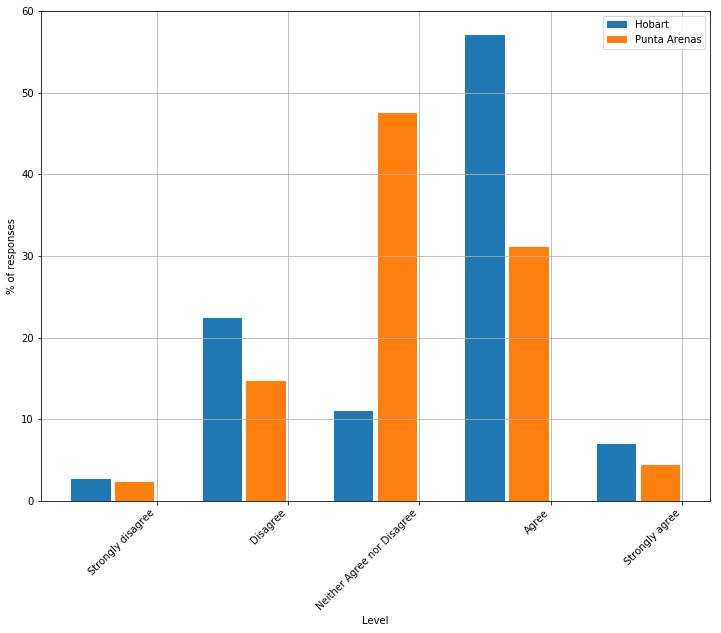

,Hobart,Punta Arenas
Strongly disagree,2.6,2.3
Disagree,22.4,14.7
Neither Agree nor Disagree,10.9,47.5
Agree,57.1,31.1
Strongly agree,7,4.3


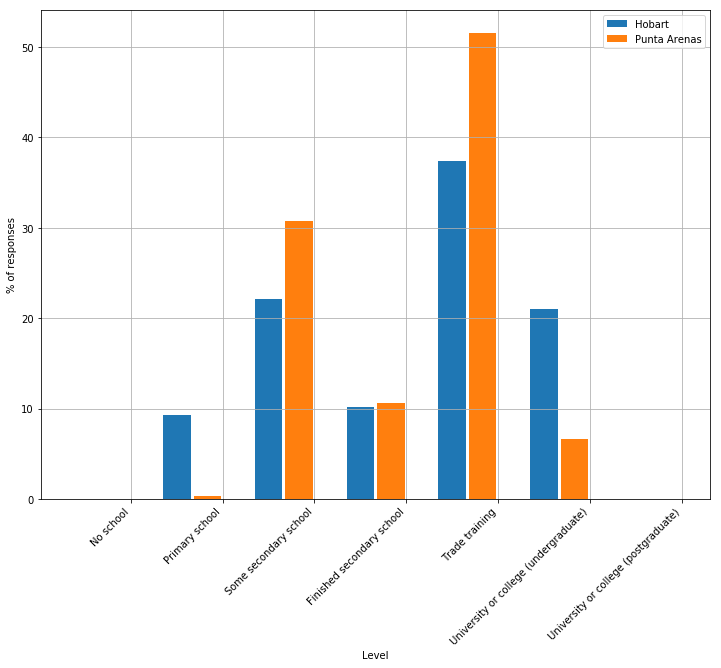

,Hobart,Punta Arenas
No school,0,0
Primary school,9.3,0.3
Some secondary school,22.1,30.8
Finished secondary school,10.2,10.7
Trade training,37.3,51.5
University or college (undergraduate),21,6.7
University or college (postgraduate),0,0


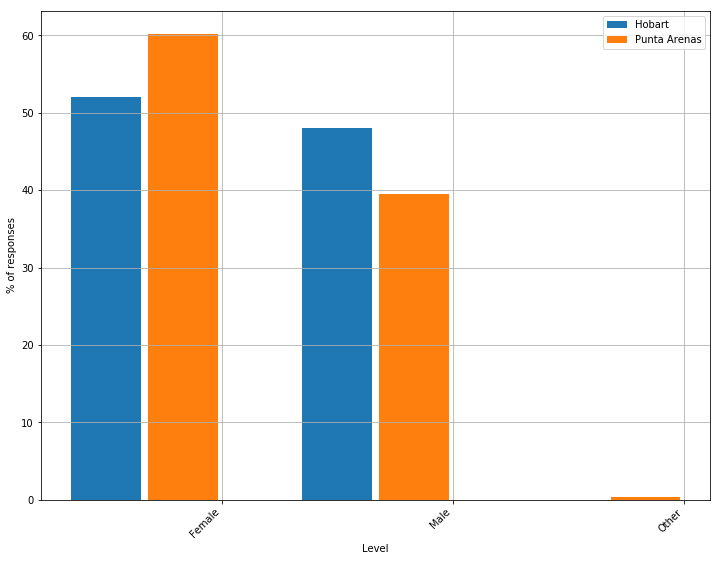

,Hobart,Punta Arenas
Female,52,60.2
Male,48,39.5
Other,0,0.3


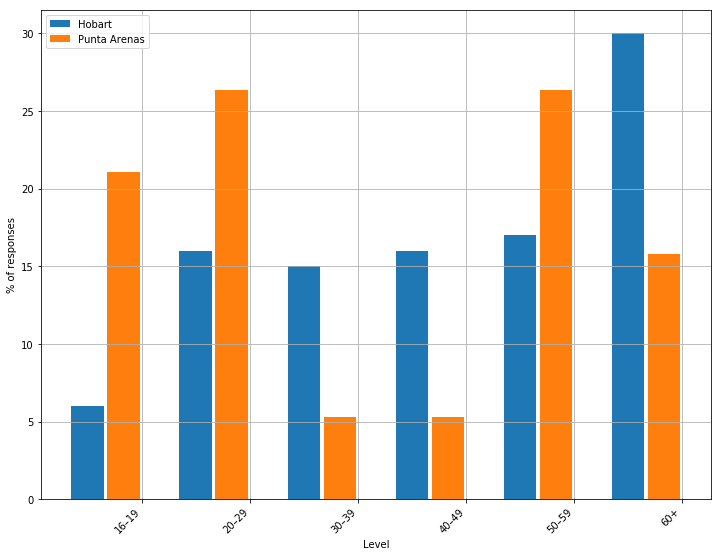

,Hobart,Punta Arenas
16–19,6,21.1
20–29,16,26.3
30–39,15,5.3
40–49,16,5.3
50–59,17,26.3
60+,30,15.8


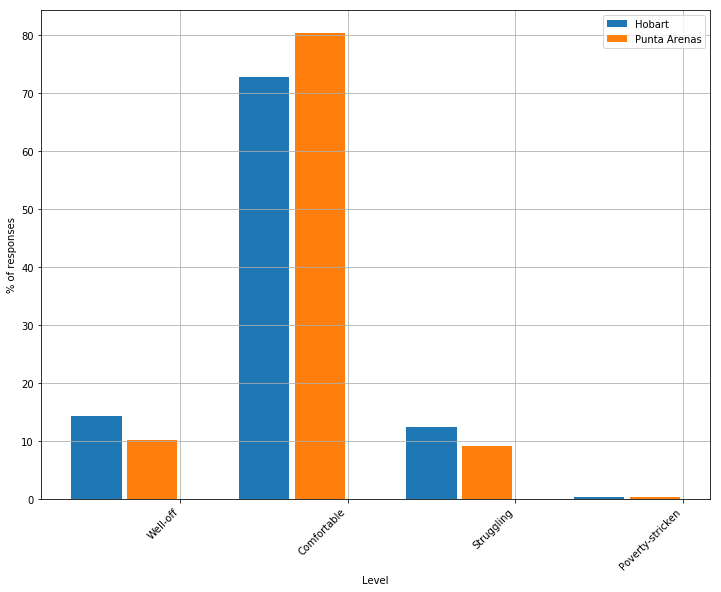

,Hobart,Punta Arenas
Well-off,14.3,10.2
Comfortable,72.9,80.3
Struggling,12.5,9.2
Poverty-stricken,0.4,0.3


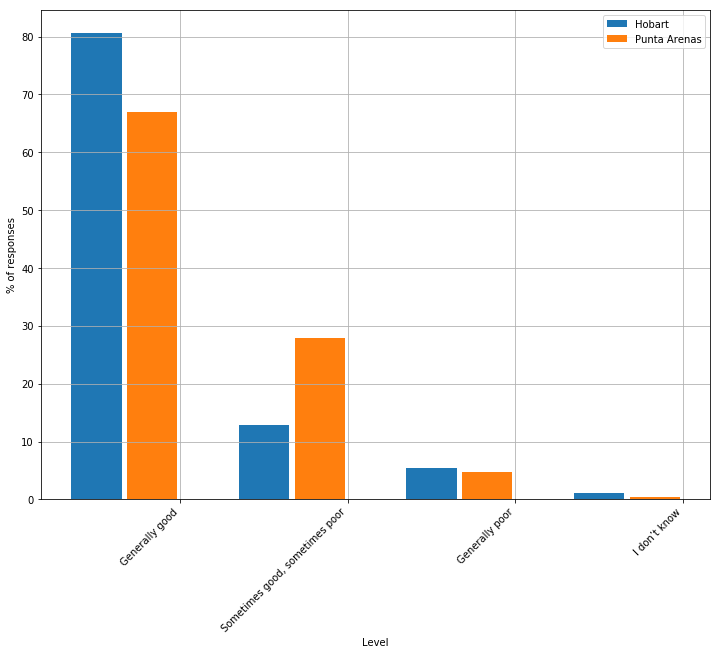

,Hobart,Punta Arenas
Generally good,80.5,67
"Sometimes good, sometimes poor",12.9,27.9
Generally poor,5.4,4.8
I don’t know,1.1,0.3


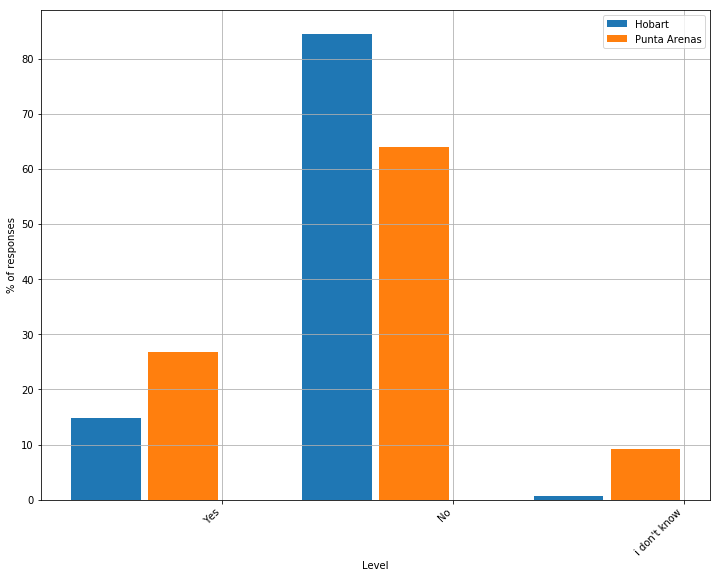

,Hobart,Punta Arenas
Yes,14.7,26.8
No,84.6,64.1
i don't know,0.7,9.2


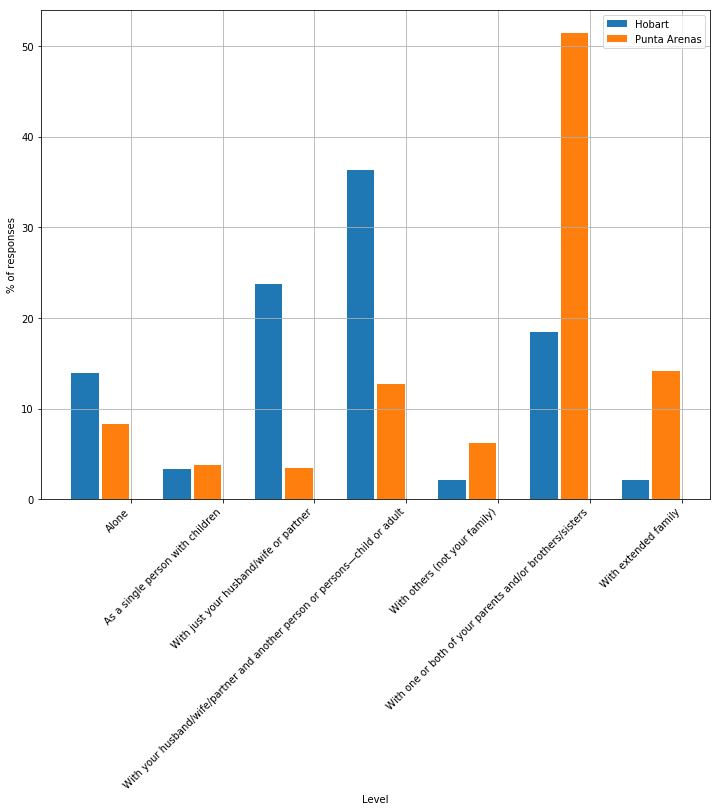

,Hobart,Punta Arenas
Alone,13.9,8.3
As a single person with children,3.4,3.8
With just your husband/wife or partner,23.7,3.4
With your husband/wife/partner and another person or persons—child or adult,36.3,12.8
With others (not your family),2.2,6.2
With one or both of your parents and/or brothers/sisters,18.5,51.4
With extended family,2.1,14.1


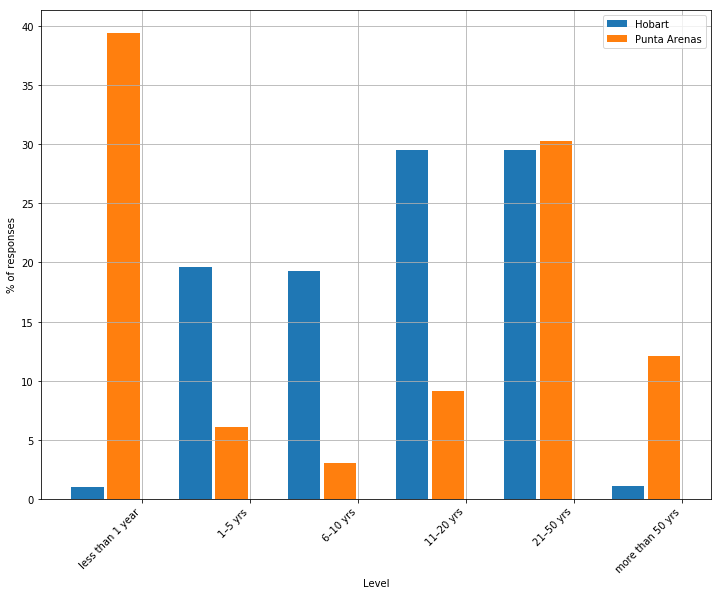

,Hobart,Punta Arenas
less than 1 year,1,39.4
1–5 yrs,19.7,6.1
6–10 yrs,19.3,3
11–20 yrs,29.5,9.1
21–50 yrs,29.5,30.3
more than 50 yrs,1.1,12.1


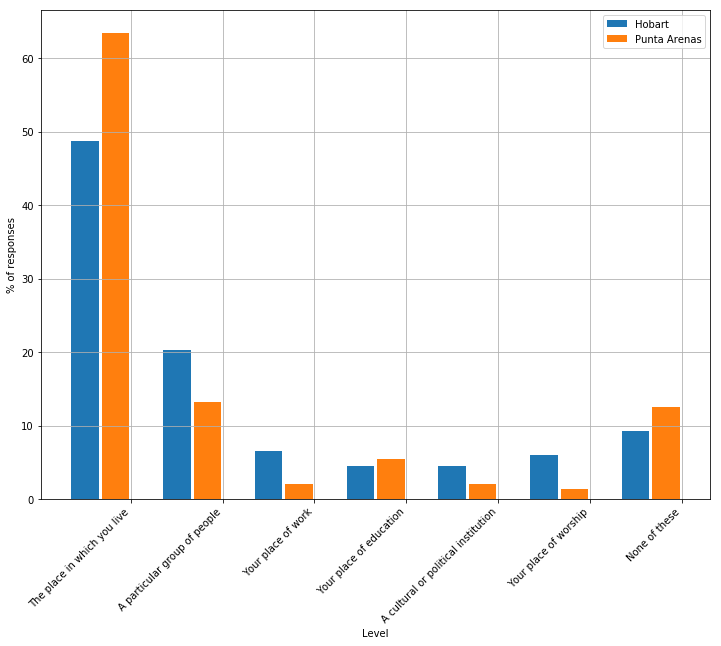

,Hobart,Punta Arenas
The place in which you live,48.7,63.4
A particular group of people,20.3,13.2
Your place of work,6.6,2
Your place of education,4.5,5.4
A cultural or political institution,4.5,2
Your place of worship,6,1.4
None of these,9.4,12.5


In [74]:
[ds.gen_histogram([x, 'Weight'], stacked = False, legend_labels = ['Hobart', 'Punta Arenas'], normalise=True, use_weights = True) for x in cols_to_render];

## Spatial Analysis for Hobart

This section shows average responses by postal area in Greater Hobart, using the first Antarctic question ("Concern about the effects of global climate change and Antarctica ice-melt") as a test. 

Other variables can be easily used, by modifying the *mapped_var* variable below.



In [14]:
mapped_var = 'An_1'

#### Load ABS spatial data of postal addresses

In [15]:
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon

d = gpd.read_file("./data/1270055003_poa_2016_aust_shape/POA_2016_AUST.dbf")
d = d[d.geometry.notna()]
d.set_index(d.POA_CODE16.astype('int32'), drop = True, inplace = True)

## Show first few records.
# d.head()

try:
    ds_hob.data['Postcode'] = ds_hob.data['Postcode'].apply(lambda x: x.decode('utf-8'))
except:
    print("Already converted?")

# Store postcodes
postcodes_hob = ds_hob.data['Postcode']

# Extract just the Hobart records
d_hob = d[d.POA_CODE16.isin(postcodes_hob)]

#### Plot the map of Greater Hobart

Plots the Greater Hobart area as a test.

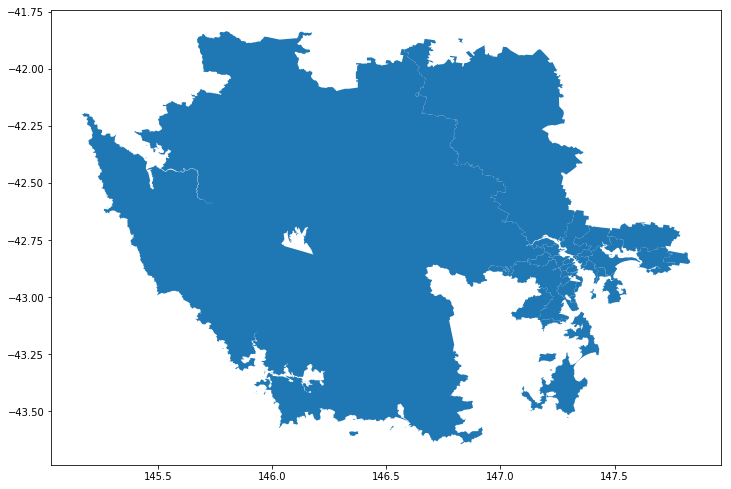

In [16]:
gpd.GeoSeries(d_hob.geometry).plot();

#### Distribution of Responses by Postal Area

Graph responses to the first variable, "Concern about the effects of global climate change and Antarctica ice-melt".

In [17]:
ds_hob.freq_table(mapped_var, weight_col = 'Weight')

,1. Effects from global climate change and Antarctic ice-melt.,Freq.,Freq. Rel.,Freq. Weighted,Freq. Weighted Rel.
index,,,,,
1.0,Not at all concerned,6,3.0,6.448204,3.2
2.0,A Little concerned,27,13.5,25.704579,12.9
3.0,Concerned,28,14.0,25.638353,12.8
4.0,Very Concerned,86,43.0,86.625130,43.3
5.0,Passionately concerned,51,25.5,53.768017,26.9


Merge survey responses with postal area geometry.

In [18]:
mapped_var_avg = ds_hob.data.groupby('Postcode').apply(lambda x: np.average(x[mapped_var], weights = x.Weight) )
mapped_var_avg.index = mapped_var_avg.index.astype(int)

sizes = ds_hob.data.groupby('Postcode').size()
sizes.index = sizes.index.astype(int)

d_hob = d_hob.merge(pd.DataFrame({'mapped_var_avg': mapped_var_avg, 'sizes': sizes}), how = 'left', left_index = True, right_index = True)

## Show the first 5 records to check the merge has worked
# d_hob.sort_values(['mapped_var_avg'], ascending = False).head()

Plot responses by postal area.

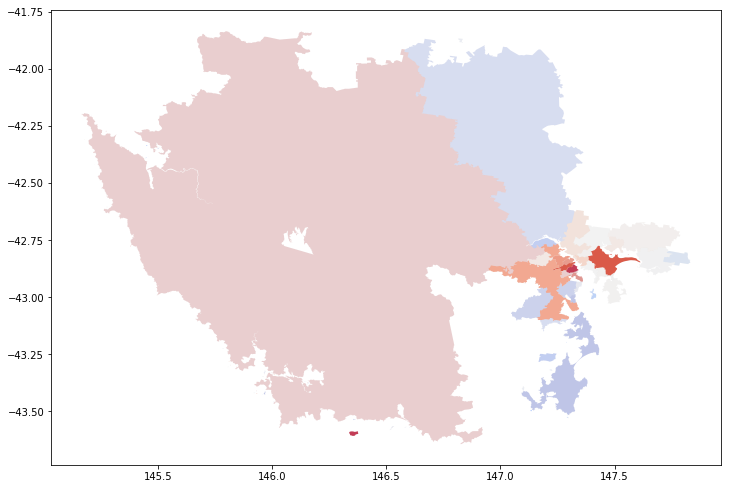

In [19]:
ax = d_hob.plot(color="grey", alpha = 0.1)

d_hob['mapped_var_avg'].fillna(0.)
d_hob_with_vals = d_hob[pd.notnull(d_hob['mapped_var_avg'])]

#d_hob_with_vals.plot(ax = ax, column='an_1_avg', cmap = 'coolwarm')

from matplotlib import cm
cm.coolwarm_r
color = cm.coolwarm_r(np.linspace(0.,1., len(d_hob_with_vals['mapped_var_avg'])))
color[:, 3] = d_hob_with_vals['sizes'] / 17.

d_hob_with_vals.plot(ax = ax, color = color);



Plot the same areas by the whole state.

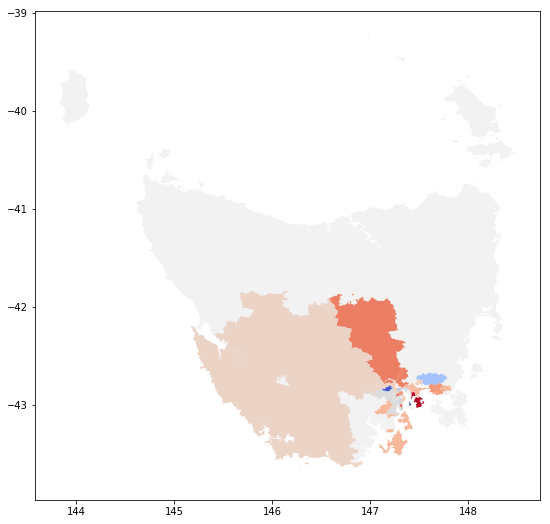

In [21]:
d_tas = d[(d.index >= 7000) & (d.index < 8000)]
d_tas = d_tas.merge(pd.DataFrame(mapped_var_avg), how = 'left', left_index = True, right_index = True)
d_tas.rename(columns={0: 'mapped_var_avg'}, inplace=True)
d_tas_with_vals = d_tas[pd.notnull(d_tas['mapped_var_avg'])]

ax_tas = d_tas.plot(color="grey", alpha = 0.1)
d_tas_with_vals.plot(ax = ax_tas, column='mapped_var_avg', cmap = 'coolwarm');

In [22]:
## Test code to examine averages by postal area. Uncomment to view.

# postcode_counts = pd.DataFrame(ds_hob.data.groupby('Postcode').apply(lambda x: np.average(x['An_1'], weights=x['Weight'])))
# s = tabulate.tabulate(postcode_counts, headers="keys", tablefmt='html')
# display(HTML(s))

## Correlations

The correlation graphs explore the strength of different relationships across the samples, both by city and overall.

In [26]:
cols_to_correlate = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21']



Generate a scatter matrix, which illustrates the distribution of correlated pairs.

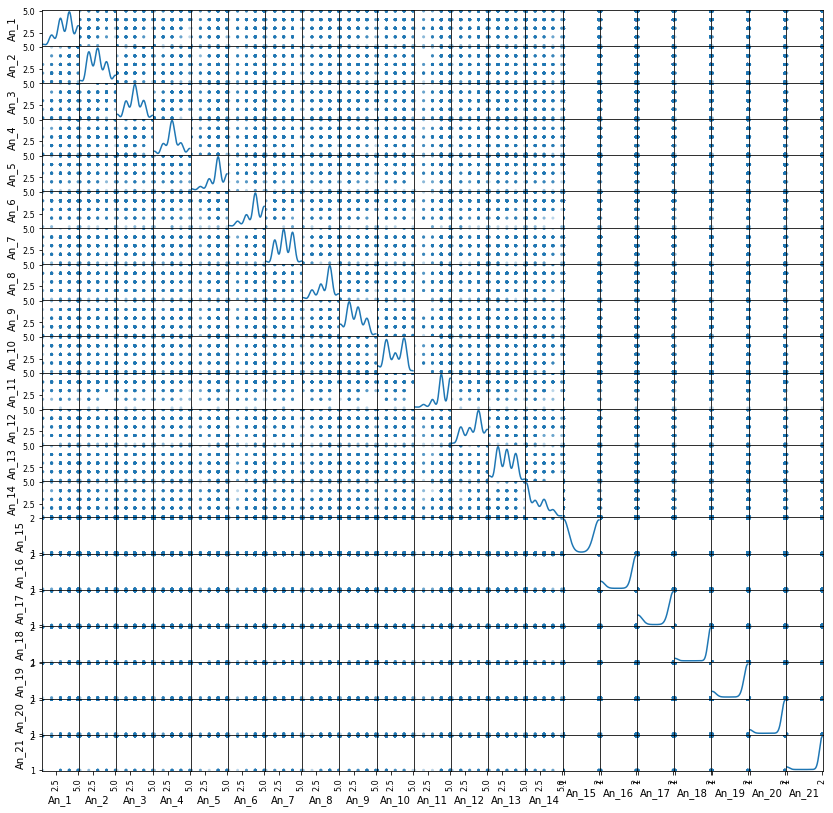

In [138]:
# From https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas
sm = pd.plotting.scatter_matrix(ds.data[cols_to_correlate], alpha = 0.3, figsize = (18,15), diagonal = 'kde')
sm;

Correlate all Antarctic variables.

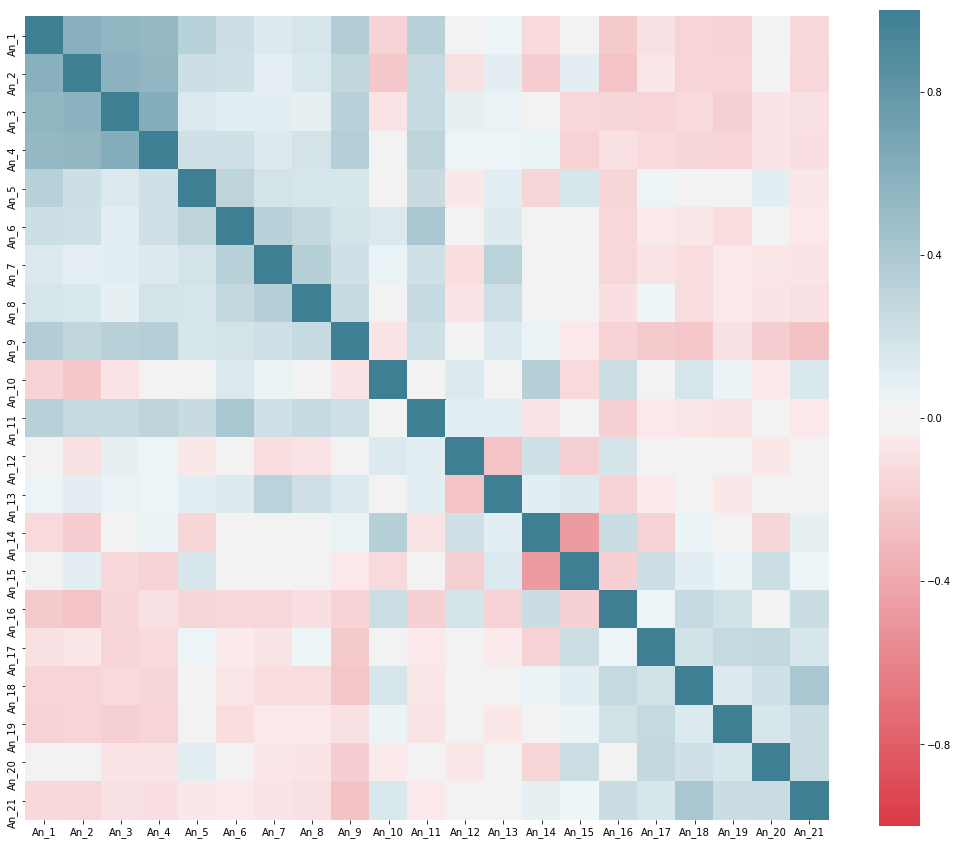

In [27]:
f, ax = plt.subplots(figsize=(18, 15))
corr = ds.data[cols_to_correlate].corr()
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 220, as_cmap=True),
            square=True, ax=ax);

## Principal Component Analysis

[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) is a procedure that aims to reduce the complexity of relationships between a large number of variables into a much smaller set. Since many of the observed variables correlate strongly, it can be difficult to determine what underlying differences might account for variations in responses. Here the smaller set consists of 2, since these are easy to visualise. 



List the features to include.

In [83]:
features = ['An_1', 'An_2', 'An_3', 'An_4', 'An_5', 'An_6',
       'An_7', 'An_8', 'An_9', 'An_10', 'An_11', 'An_12', 'An_13', 'An_14',
       'An_15', 'An_16', 'An_17', 'An_18', 'An_19', 'An_20', 'An_21',
        'Satis_1', 'Satis_2', 'Satis_3',
       'Satis_4', 'Satis_5', 'Satis_6', 'Satis_7', 'Satis_8', 'Satis_9',
       'Satis_10', 'Satis_11', 'Satis_12', 'Satis_13', 'Satis_14', 'Satis_15',
       'Satis_16', 'Satis_17', 'Satis_18', 'Satis_19', 'Satis_20', 'Satis_21',
       'Satis_22', 'Satis_23', 'Satis_24', 'Satis_25', 'Satis_26', 'Satis_27',
       'Satis_28', 'Satis_29', 'Satis_30', 'Satis_31', 'Satis_32', 'Satis_33',
       'Satis_34', 'Satis_35', 'Satis_36', 'Satis_37', 'Satis_38', 'Satis_39',
       'Satis_40']



Scale all variable values.

In [84]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = ds.data.loc[:, features].values.astype(np.int32)

# Separating out the target
#y = ds_syd_merged.loc[:,['sex']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Create the city series.
city = pd.Series(ds.data.index.get_level_values(0))
city.name = 'city'




/home/ubuntu/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Run the PCA procedure.

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, city], axis = 1)

Graph the PCA results.

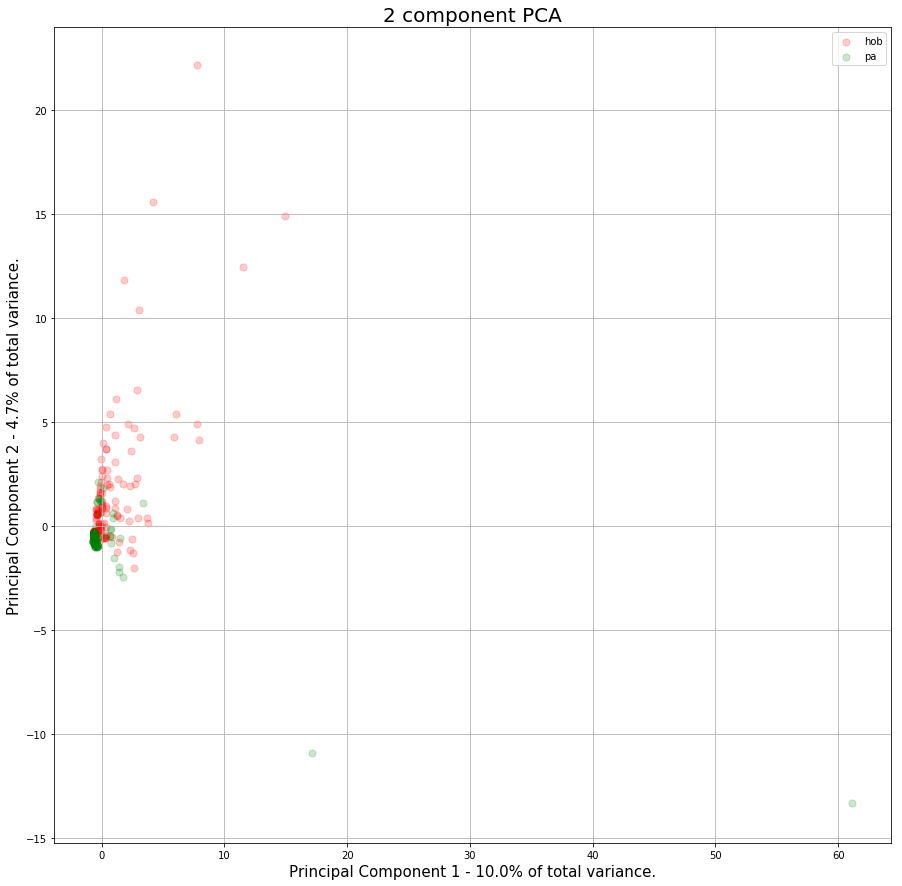

In [139]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 - ' + str(pca.explained_variance_[0].round(1)) + '% of total variance.', fontsize = 15)
ax.set_ylabel('Principal Component 2 - ' + str(pca.explained_variance_[1].round(1)) + '% of total variance.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['city'] == target
    pc1 = finalDf.loc[indicesToKeep, 'principal component 1']
    pc2 = finalDf.loc[indicesToKeep, 'principal component 2']
    ax.scatter(pc1
               , pc2
               , c = color
               , s = 50
              , alpha = 0.2)

ax.legend(targets)
ax.grid()

Graph the PCA results, including labels for outliers.

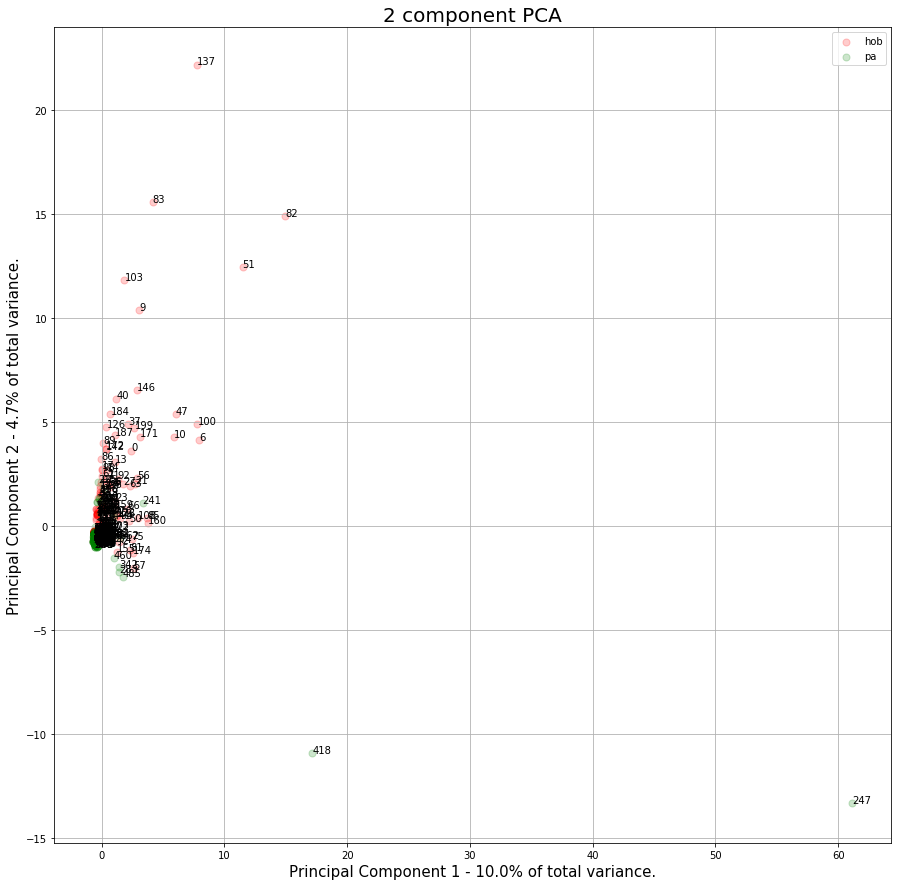

In [140]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 - ' + str(pca.explained_variance_[0].round(1)) + '% of total variance.', fontsize = 15)
ax.set_ylabel('Principal Component 2 - ' + str(pca.explained_variance_[1].round(1)) + '% of total variance.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['city'] == target
    pc1 = finalDf.loc[indicesToKeep, 'principal component 1']
    pc2 = finalDf.loc[indicesToKeep, 'principal component 2']
    ax.scatter(pc1
               , pc2
               , c = color
               , s = 50
              , alpha = 0.2)
    for i, txt in enumerate(pc1.index):
        ax.annotate(str(txt), (pc1.iloc[i], pc2.iloc[i]))

ax.legend(targets)
ax.grid()

Remove outliers, and re-run the analysis.

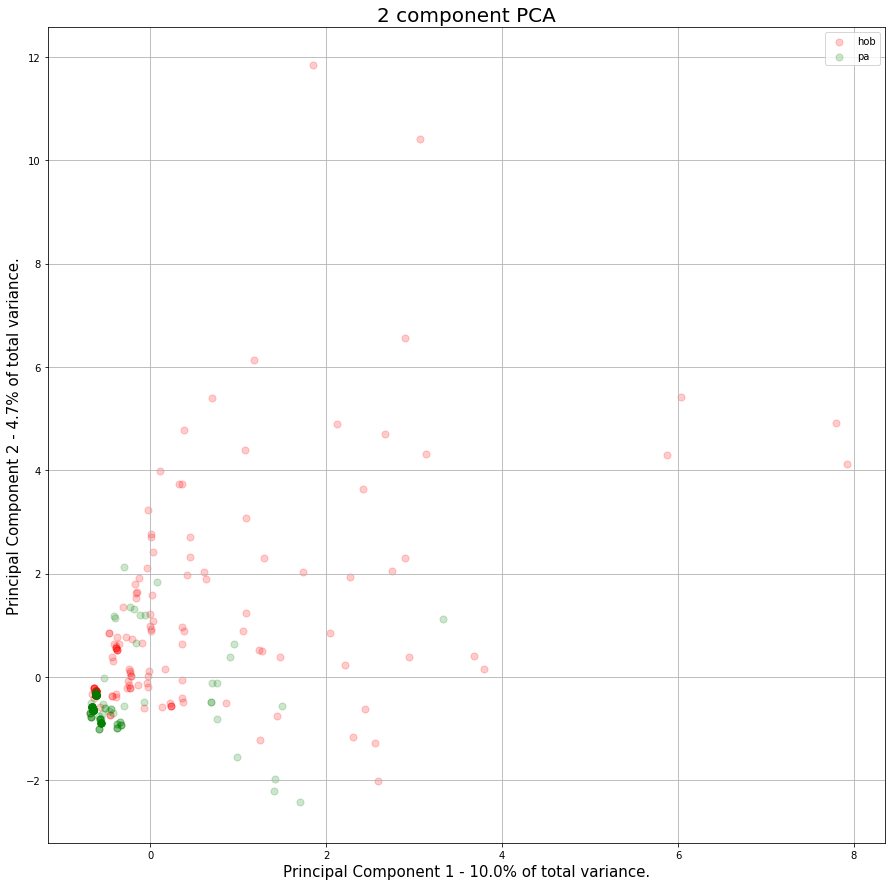

In [141]:
x_no_outliers = np.delete(x, [51, 82, 83, 137, 247, 418])

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, city], axis = 1)


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 - ' + str(pca.explained_variance_[0].round(1)) + '% of total variance.', fontsize = 15)
ax.set_ylabel('Principal Component 2 - ' + str(pca.explained_variance_[1].round(1)) + '% of total variance.', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_no_outliers['city'] == target
    pc1 = finalDf_no_outliers.loc[indicesToKeep, 'principal component 1']
    pc2 = finalDf_no_outliers.loc[indicesToKeep, 'principal component 2']
    ax.scatter(pc1
               , pc2
               , c = color
               , s = 50
              , alpha = 0.2)

ax.legend(targets)
ax.grid()

## Appendix 1 - List of Variables

In [43]:
s = tabulate.tabulate(([x.decode('utf-8'), y.decode('windows-1252')] for x, y in ds.metadata.varLabels.items()), headers = ('Variable name', 'Label'), tablefmt='html')
## Write it out to a file for reference
# with open("cos-metadata.html", "w") as text_file:
#     text_file.write(s)
display(HTML(s))

Variable name,Label
Folio,identification number of the survey
Location,City
An_1,1. Effects from global climate change and Antarctic ice-melt.
An_2,2. Increasing commercial activities in the Southern Ocean and Antarctica.
An_3,3. Political tensions concerning how different nation-states relate to Antarctica.
An_4,4. Disagreement over what Antarctica means as a symbol of our planet’s common future.
An_5,5. How we treat Antarctica is a test of our approach to ecological sustainability?
An_6,6. Strong connections to Antarctica are important to the economic future of our city.
An_7,7. Local government makes decisions that are informed by the city’s existing connections with the Antarctic region.
An_8,8. People in my city can influence the cultural meanings that shape our relationship to Antarctica.
